In [17]:
import pandas as pd
import os

# Assuming results is a list of DataFrames
results = []
for filename in os.listdir('results'):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join('results', filename))
        results.append(df)
combined_df = pd.concat(results, ignore_index=True)
length_of_combined_df = len(combined_df)

print("Length of the combined DataFrame:", length_of_combined_df)
combined_df.to_csv('combined_results.csv', index=False)

import seaborn as sns

import matplotlib.pyplot as plt

def warmstartconv(str):
    return 'warmstart' if str else 'regstart'
# Calculate the percent of optimal solution
combined_df['percent_optimal'] = (combined_df['quantum_obj_value'] / combined_df['classic_value']) * 100

combined_df['identifier'] = combined_df['param_initialization'] + ' '+ combined_df['warm_start'].apply(lambda x: warmstartconv(x)) 

Length of the combined DataFrame: 4000


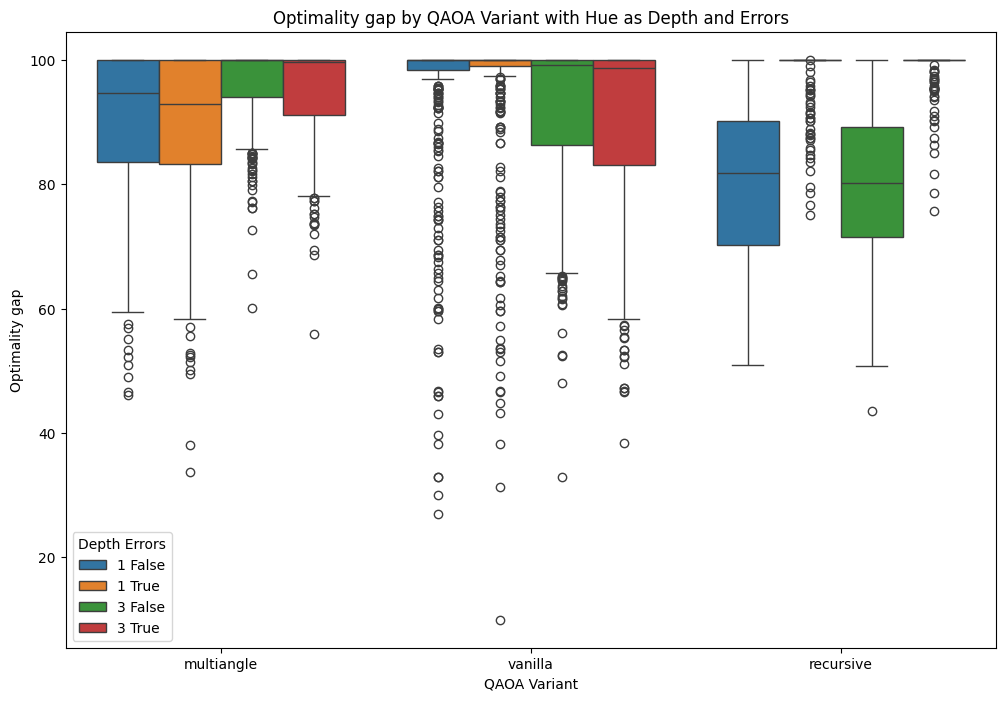

In [18]:
# Create a new column for hue
combined_df['hue'] = combined_df['depth'].astype(str) + ' ' + combined_df['errors'].astype(str)

# Plot the data
plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_df, x='qaoa_variant', y='percent_optimal', hue='hue')
plt.xlabel('QAOA Variant')
plt.ylabel('Optimality gap')
plt.title('Optimality gap by QAOA Variant with Hue as Depth and Errors')
plt.legend(title='Depth Errors')
plt.show()

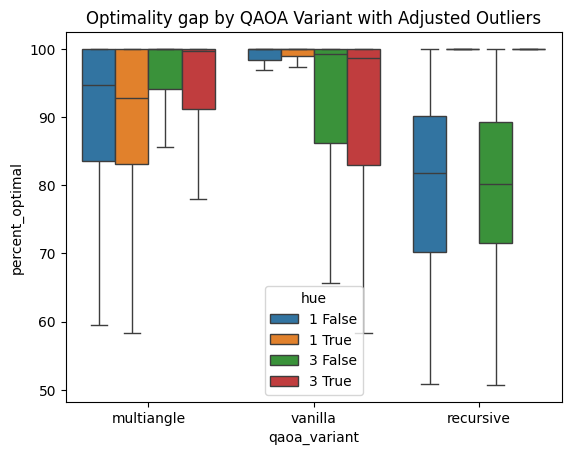

In [19]:
# Example boxplot with enhanced clarity
sns.boxplot(data=combined_df, x='qaoa_variant', y='percent_optimal', hue='hue', showfliers=False)
plt.title("Optimality gap by QAOA Variant with Adjusted Outliers")
plt.show()

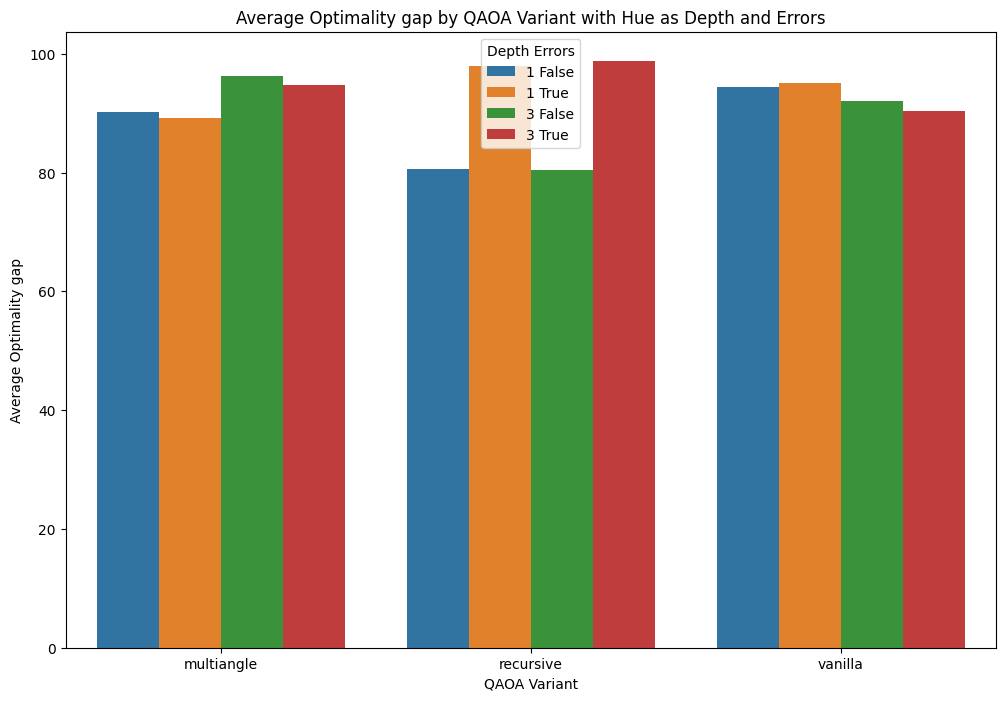

In [20]:
# Group by 'qaoa_variant' and 'hue' and calculate the mean of 'percent_optimal'
average_percent_optimal = combined_df.groupby(['qaoa_variant', 'hue'])['percent_optimal'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=average_percent_optimal, x='qaoa_variant', y='percent_optimal', hue='hue')
plt.xlabel('QAOA Variant')
plt.ylabel('Average Optimality gap')
plt.title('Average Optimality gap by QAOA Variant with Hue as Depth and Errors')
plt.legend(title='Depth Errors')
plt.show()

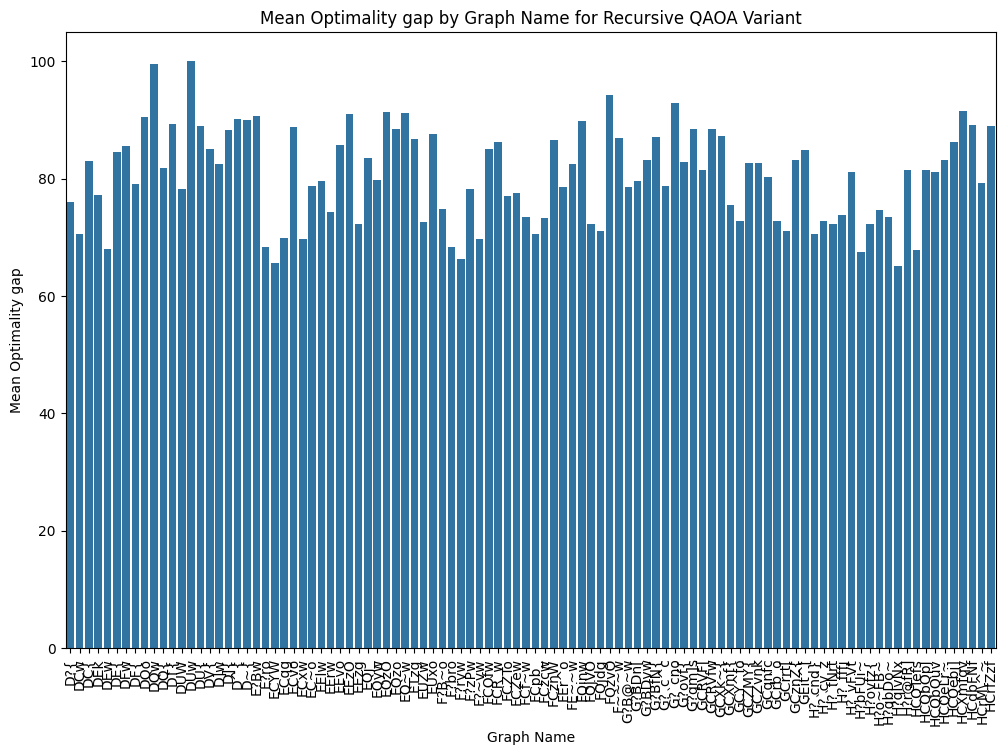

In [21]:
# Filter the DataFrame for the 'recursive' qaoa_variant
recursive_df = combined_df[(combined_df['qaoa_variant'] == 'recursive') & (combined_df['errors'] == False)]

# Group by 'graph_name' and calculate the mean of 'percent_optimal'
mean_percent_optimal = recursive_df.groupby('graph_name')['percent_optimal'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_percent_optimal, x='graph_name', y='percent_optimal')
plt.xlabel('Graph Name')
plt.ylabel('Mean Optimality gap')
plt.title('Mean Optimality gap by Graph Name for Recursive QAOA Variant')
plt.xticks(rotation=90)
plt.show()

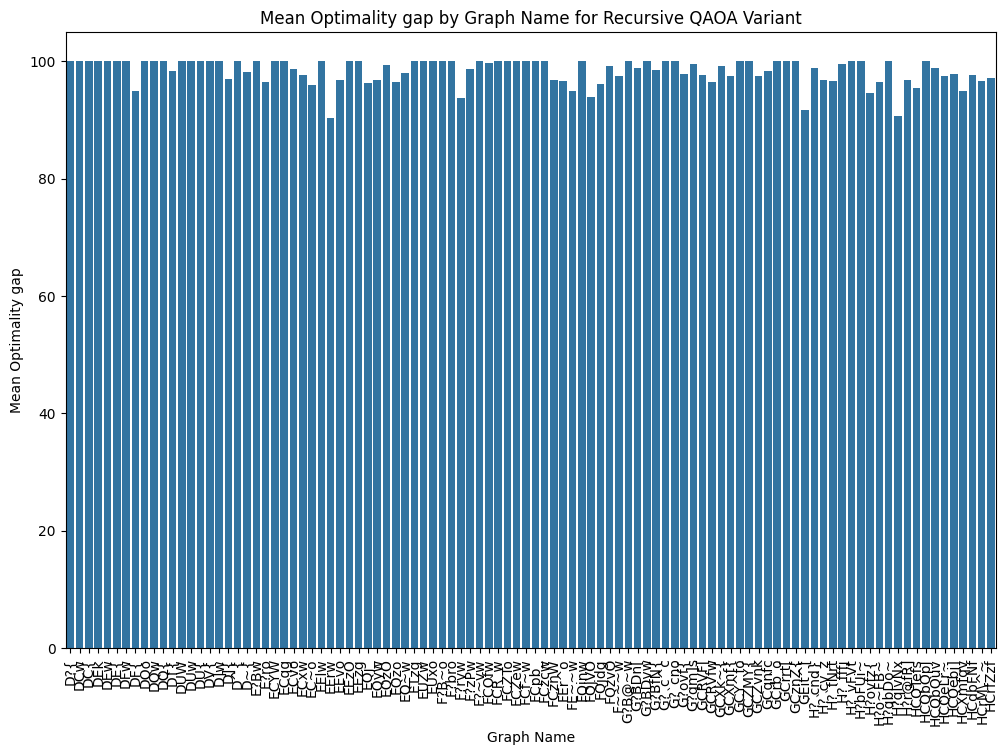

In [22]:
# Filter the DataFrame for the 'recursive' qaoa_variant
recursive_df = combined_df[(combined_df['qaoa_variant'] == 'recursive') & (combined_df['errors'] == True)]

# Group by 'graph_name' and calculate the mean of 'percent_optimal'
mean_percent_optimal = recursive_df.groupby('graph_name')['percent_optimal'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_percent_optimal, x='graph_name', y='percent_optimal')
plt.xlabel('Graph Name')
plt.ylabel('Mean Optimality gap')
plt.title('Mean Optimality gap by Graph Name for Recursive QAOA Variant')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Calculate the difference between the maximum and minimum Optimality gap values for each graph name
mean_percent_optimal_diff = mean_percent_optimal.groupby('graph_name')['percent_optimal'].agg(['max', 'min'])
mean_percent_optimal_diff['diff'] = mean_percent_optimal_diff['max'] - mean_percent_optimal_diff['min']

# Find the graph name with the largest difference
max_diff_graph_name = mean_percent_optimal_diff['diff'].idxmax()
max_diff_value = mean_percent_optimal_diff['diff'].max()

print(f"Graph name with the biggest difference in mean Optimality gap value: {max_diff_graph_name}")
print(f"Difference in mean Optimality gap value: {max_diff_value}")
# Calculate the mean Optimality gap value for errors = True
mean_percent_optimal_errors_true = combined_df[combined_df['errors'] == True].groupby('graph_name')['percent_optimal'].mean().reset_index()
mean_percent_optimal_errors_true.columns = ['graph_name', 'mean_percent_optimal_errors_true']

# Calculate the mean Optimality gap value for errors = False
mean_percent_optimal_errors_false = combined_df[combined_df['errors'] == False].groupby('graph_name')['percent_optimal'].mean().reset_index()
mean_percent_optimal_errors_false.columns = ['graph_name', 'mean_percent_optimal_errors_false']

# Merge the two DataFrames on 'graph_name'
mean_percent_optimal_comparison = pd.merge(mean_percent_optimal_errors_true, mean_percent_optimal_errors_false, on='graph_name')

# Calculate the difference between the mean Optimality gap values
mean_percent_optimal_comparison['difference'] = mean_percent_optimal_comparison['mean_percent_optimal_errors_true'] - mean_percent_optimal_comparison['mean_percent_optimal_errors_false']

# Display the comparison DataFrame
# Sort by the 'difference' column
mean_percent_optimal_comparison_sorted = mean_percent_optimal_comparison.sort_values(by='difference', ascending=False)

# Display the sorted comparison DataFrame
print(mean_percent_optimal_comparison_sorted.head(10))
# Print the top 10 graph names with the highest difference in mean Optimality gap value
top_10_graph_names = mean_percent_optimal_comparison_sorted.head(10)['graph_name']
print("Top 10 graph names with the highest difference in mean Optimality gap value:")
print(top_10_graph_names.tolist())

Graph name with the biggest difference in mean Optimality gap value: D?{
Difference in mean Optimality gap value: 0.0
   graph_name  mean_percent_optimal_errors_true  \
57      FQjdg                         92.212736   
42      F?rvw                         98.753922   
88    H?qbDo~                         97.136851   
51      FCzcw                         94.995052   
72     GCY^fo                         96.158541   
38       EUZw                         98.575191   
10        DQ{                         96.696205   
22       ECYW                         97.101887   
76     GCrb`o                         96.838668   
62     G?BDvw                         91.749505   

    mean_percent_optimal_errors_false  difference  
57                          81.159968   11.052768  
42                          88.968784    9.785138  
88                          87.614429    9.522422  
51                          85.526775    9.468277  
72                          86.989254    9.169287  
38      

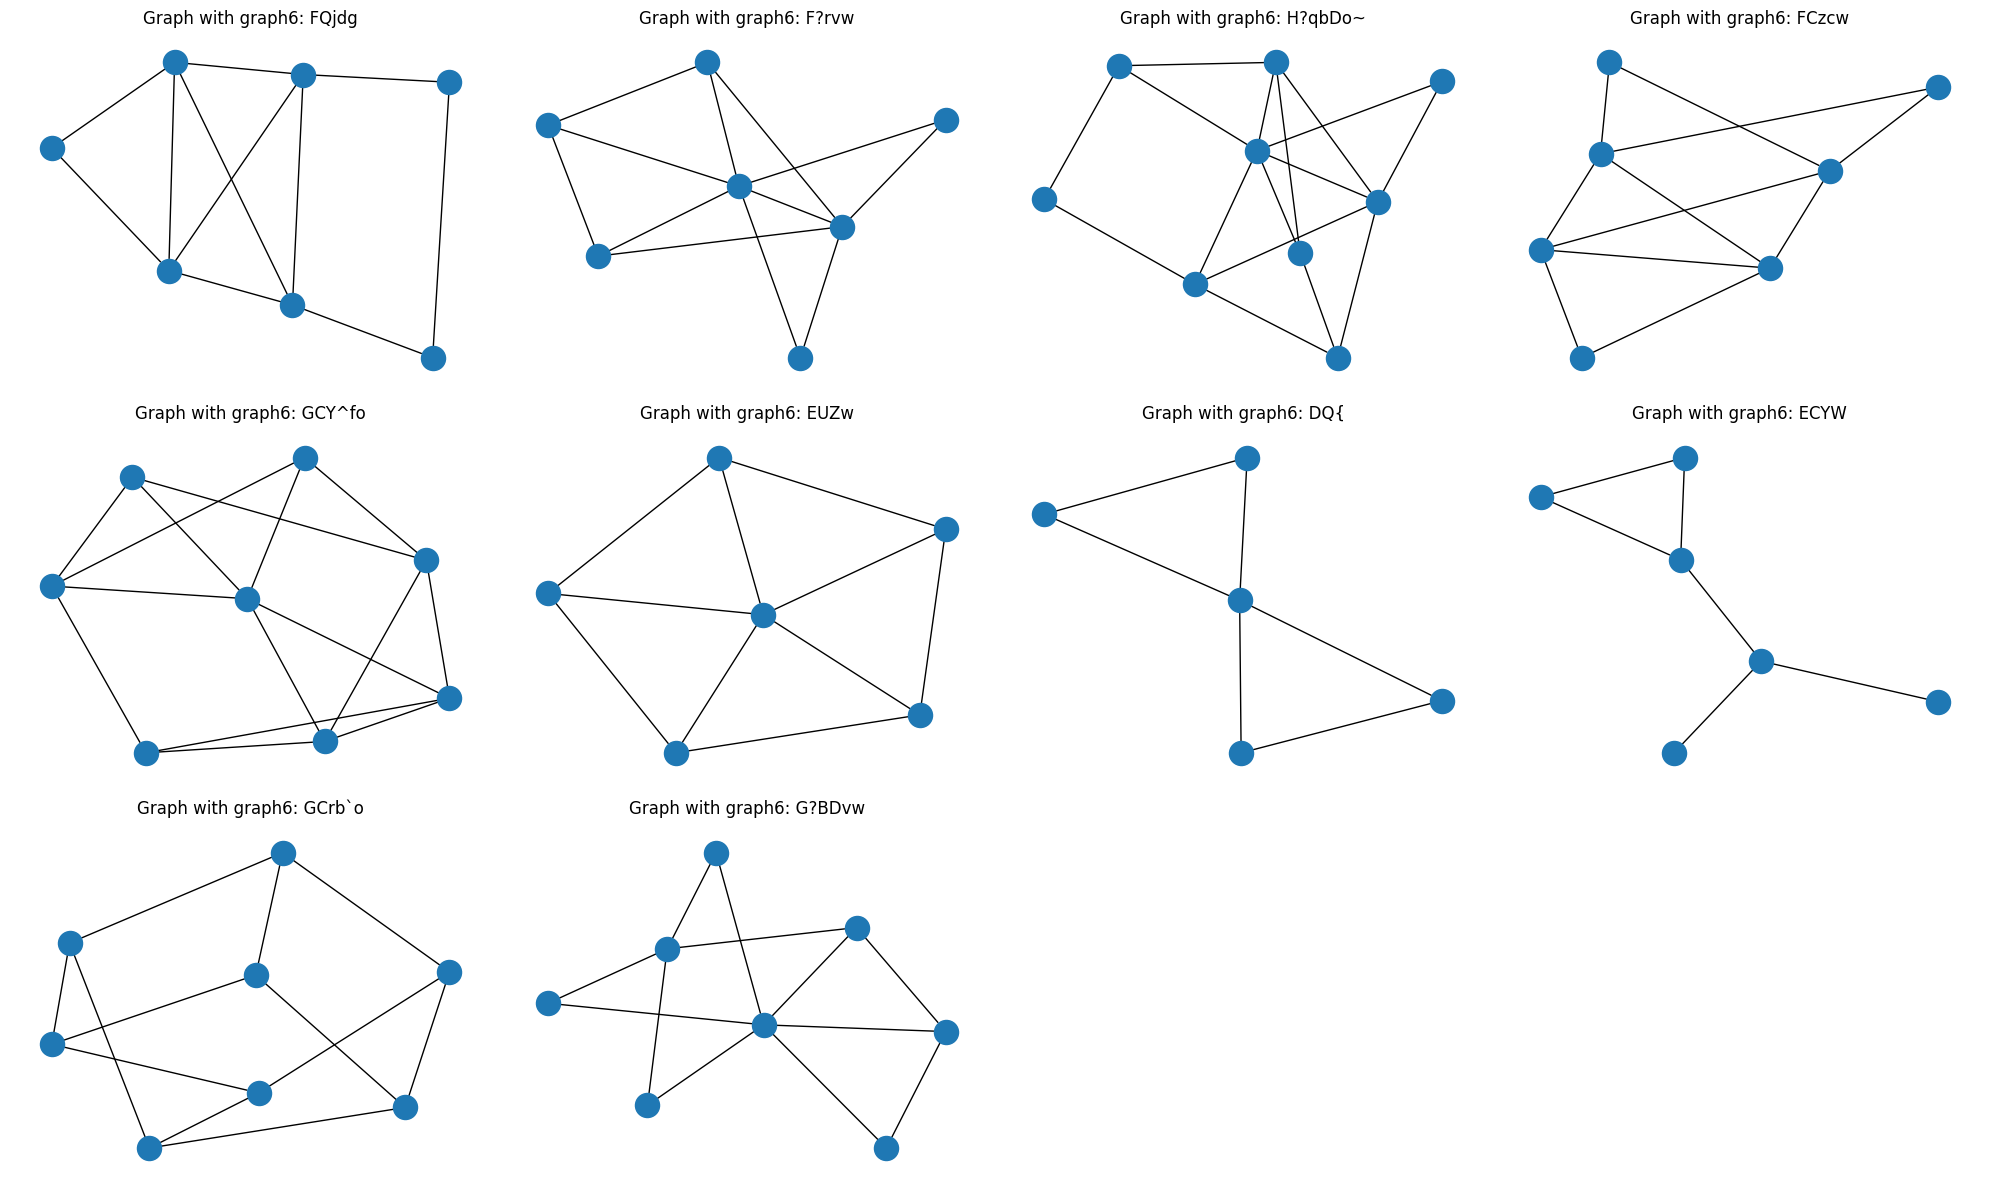

In [24]:
from MaxCutProblem import MaxCutProblem
problem = MaxCutProblem()
problem.draw_given_graphs(['FQjdg', 'F?rvw', 'H?qbDo~', 'FCzcw', 'GCY^fo', 'EUZw', 'DQ{', 'ECYW', 'GCrb`o', 'G?BDvw'])

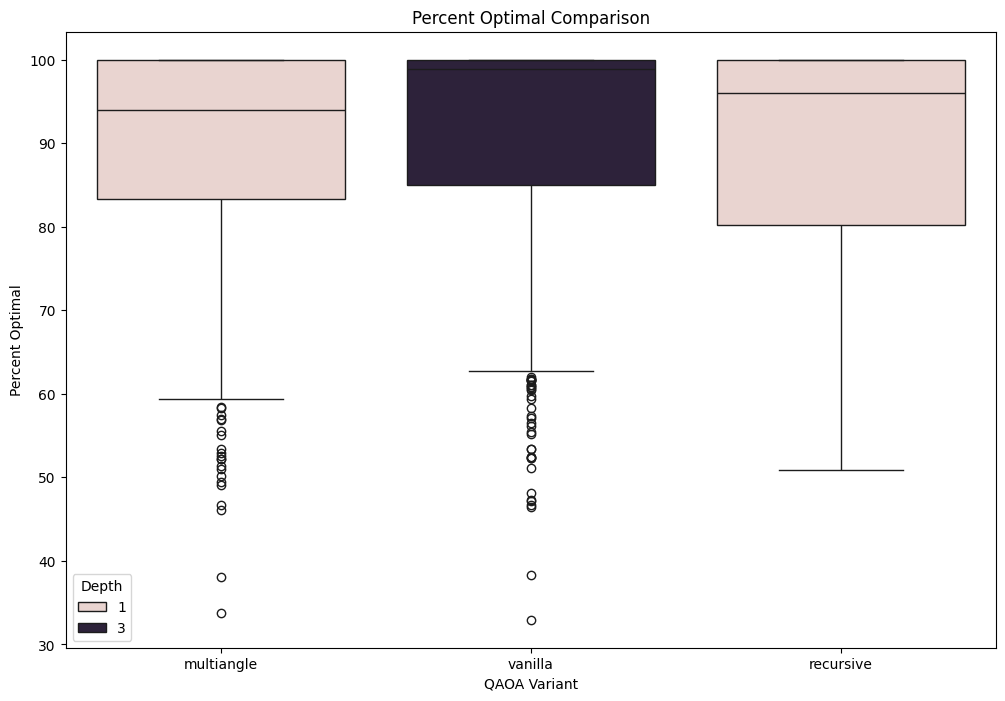

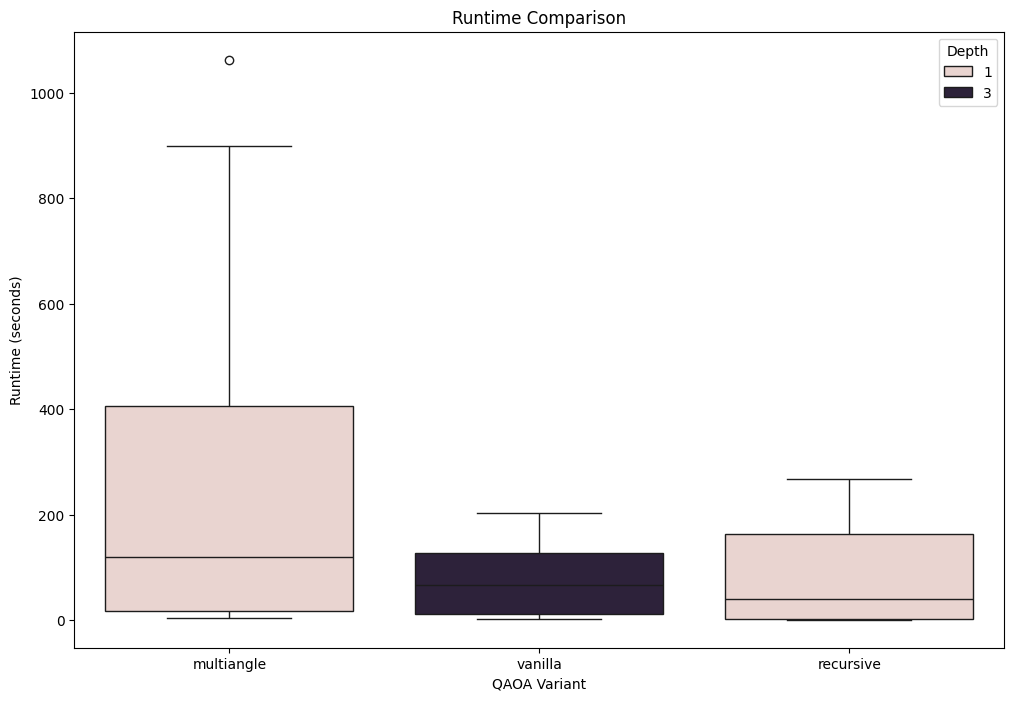

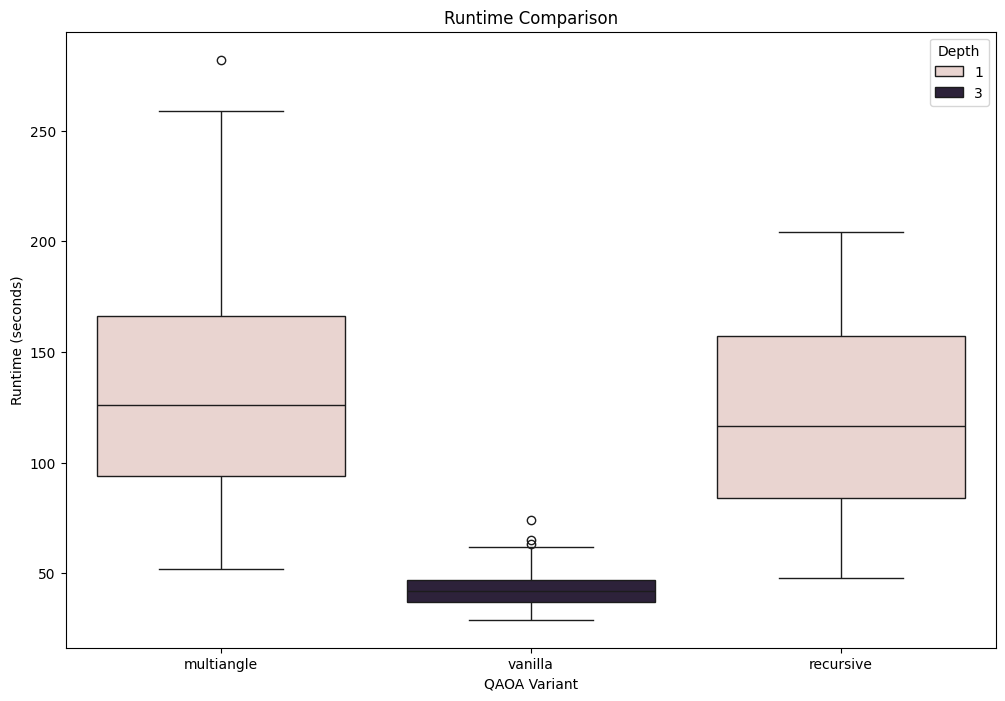

   qaoa_variant      hue  percent_optimal
0    multiangle  1 False        90.201466
1    multiangle   1 True        89.203358
2    multiangle  3 False        96.309366
3    multiangle   3 True        94.803447
4     recursive  1 False        80.656263
5     recursive   1 True        97.999021
6     recursive  3 False        80.426089
7     recursive   3 True        98.778450
8       vanilla  1 False        94.406369
9       vanilla   1 True        95.095127
10      vanilla  3 False        92.027814
11      vanilla   3 True        90.373428


In [ ]:
# Filter the DataFrame for the required conditions
filtered_df = combined_df[((combined_df['qaoa_variant'] == 'multiangle') & (combined_df['depth'] == 1)) |
                          ((combined_df['qaoa_variant'] == 'recursive') & (combined_df['depth'] == 1)) |
                          ((combined_df['qaoa_variant'] == 'vanilla') & (combined_df['depth'] == 3))]

# Plot percent optimal
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='qaoa_variant', y='percent_optimal', hue='depth')
plt.xlabel('QAOA Variant')
plt.ylabel('Optimality gap')
plt.title('Optimality gap Comparison')
plt.legend(title='Depth')
plt.show()

# Plot runtime
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='qaoa_variant', y='time_elapsed', hue='depth')
plt.xlabel('QAOA Variant')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Comparison')
plt.legend(title='Depth')
plt.show()

# Plot qfev
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='qaoa_variant', y='quantum_func_evals', hue='depth')
plt.xlabel('QAOA Variant')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Comparison')
plt.legend(title='Depth')
plt.show()
# Print average percent optimal
print(average_percent_optimal)

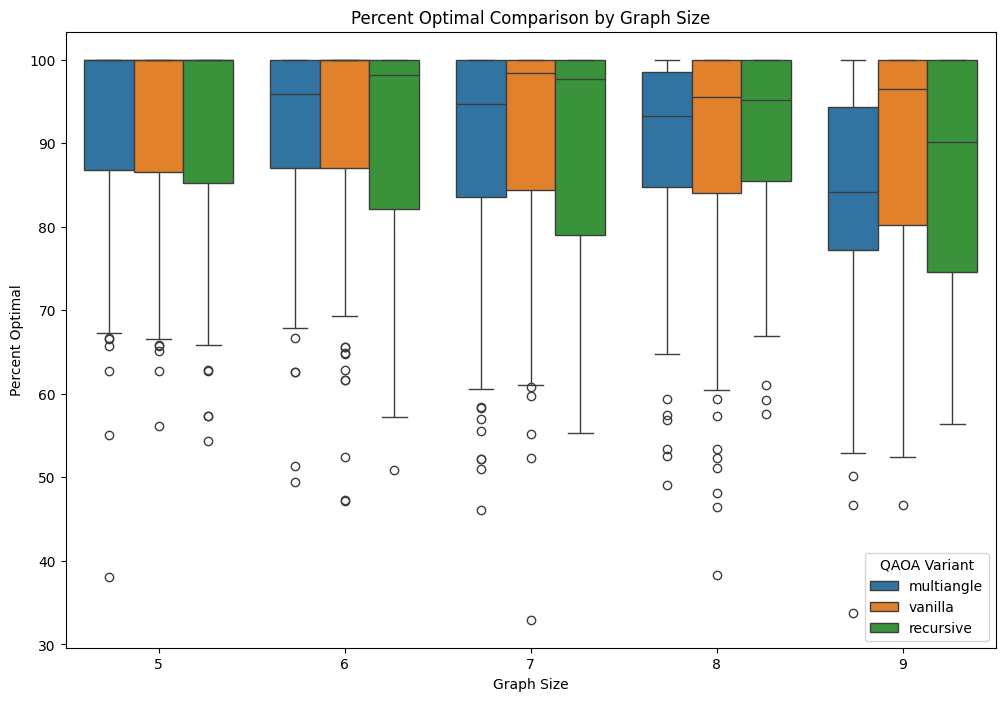

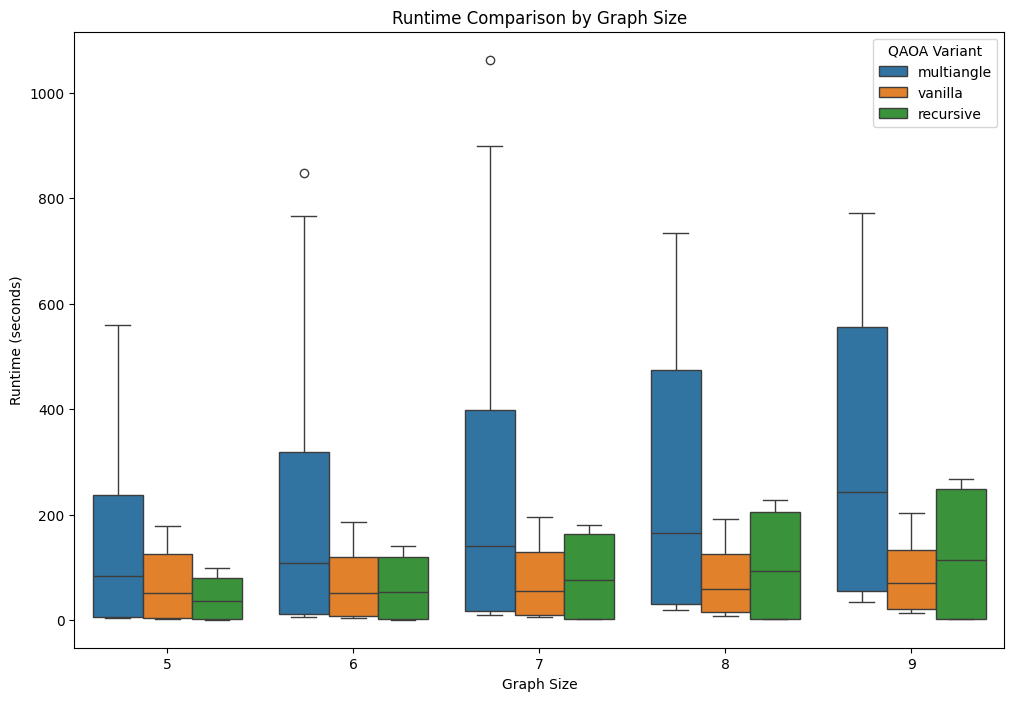

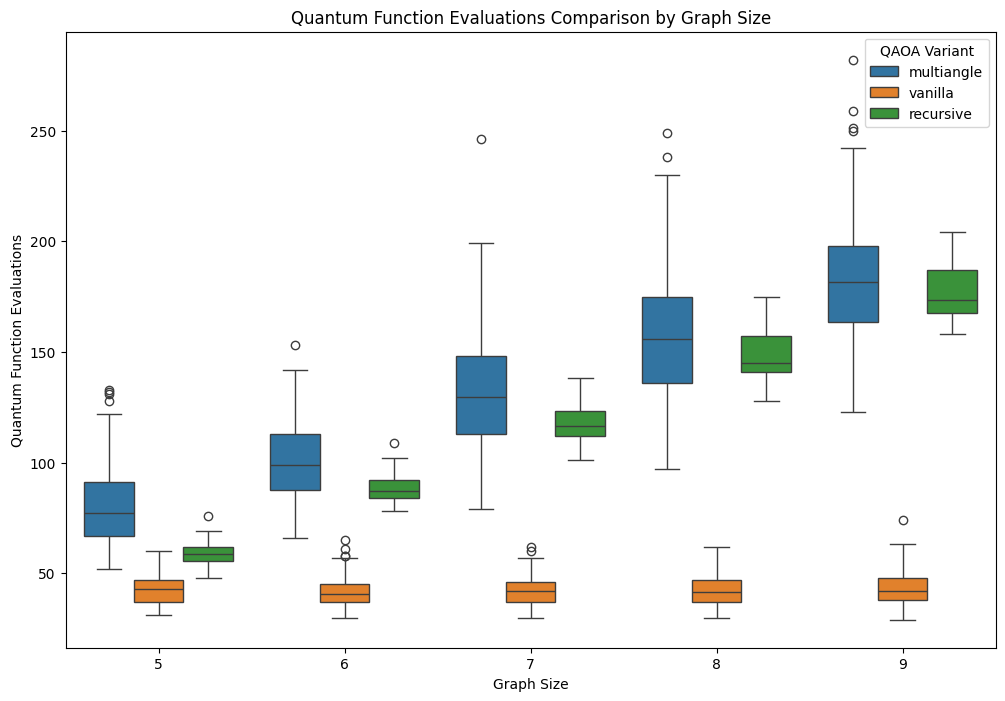

   qaoa_variant      hue  percent_optimal
0    multiangle  1 False        90.201466
1    multiangle   1 True        89.203358
2    multiangle  3 False        96.309366
3    multiangle   3 True        94.803447
4     recursive  1 False        80.656263
5     recursive   1 True        97.999021
6     recursive  3 False        80.426089
7     recursive   3 True        98.778450
8       vanilla  1 False        94.406369
9       vanilla   1 True        95.095127
10      vanilla  3 False        92.027814
11      vanilla   3 True        90.373428


In [ ]:
# Filter the DataFrame for the required conditions
filtered_df = combined_df[((combined_df['qaoa_variant'] == 'multiangle') & (combined_df['depth'] == 1)) |
                          ((combined_df['qaoa_variant'] == 'recursive') & (combined_df['depth'] == 1)) |
                          ((combined_df['qaoa_variant'] == 'vanilla') & (combined_df['depth'] == 3))]

# Plot percent optimal
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='graph_size', y='percent_optimal', hue='qaoa_variant')
plt.xlabel('Graph Size')
plt.ylabel('Optimality gap')
plt.title('Optimality gap Comparison by Graph Size')
plt.legend(title='QAOA Variant')
plt.show()

# Plot runtime
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='graph_size', y='time_elapsed', hue='qaoa_variant')
plt.xlabel('Graph Size')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Comparison by Graph Size')
plt.legend(title='QAOA Variant')
plt.show()

# Plot qfev
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='graph_size', y='quantum_func_evals', hue='qaoa_variant')
plt.xlabel('Graph Size')
plt.ylabel('Quantum Function Evaluations')
plt.title('Quantum Function Evaluations Comparison by Graph Size')
plt.legend(title='QAOA Variant')
plt.show()

# Print average percent optimal
print(average_percent_optimal)

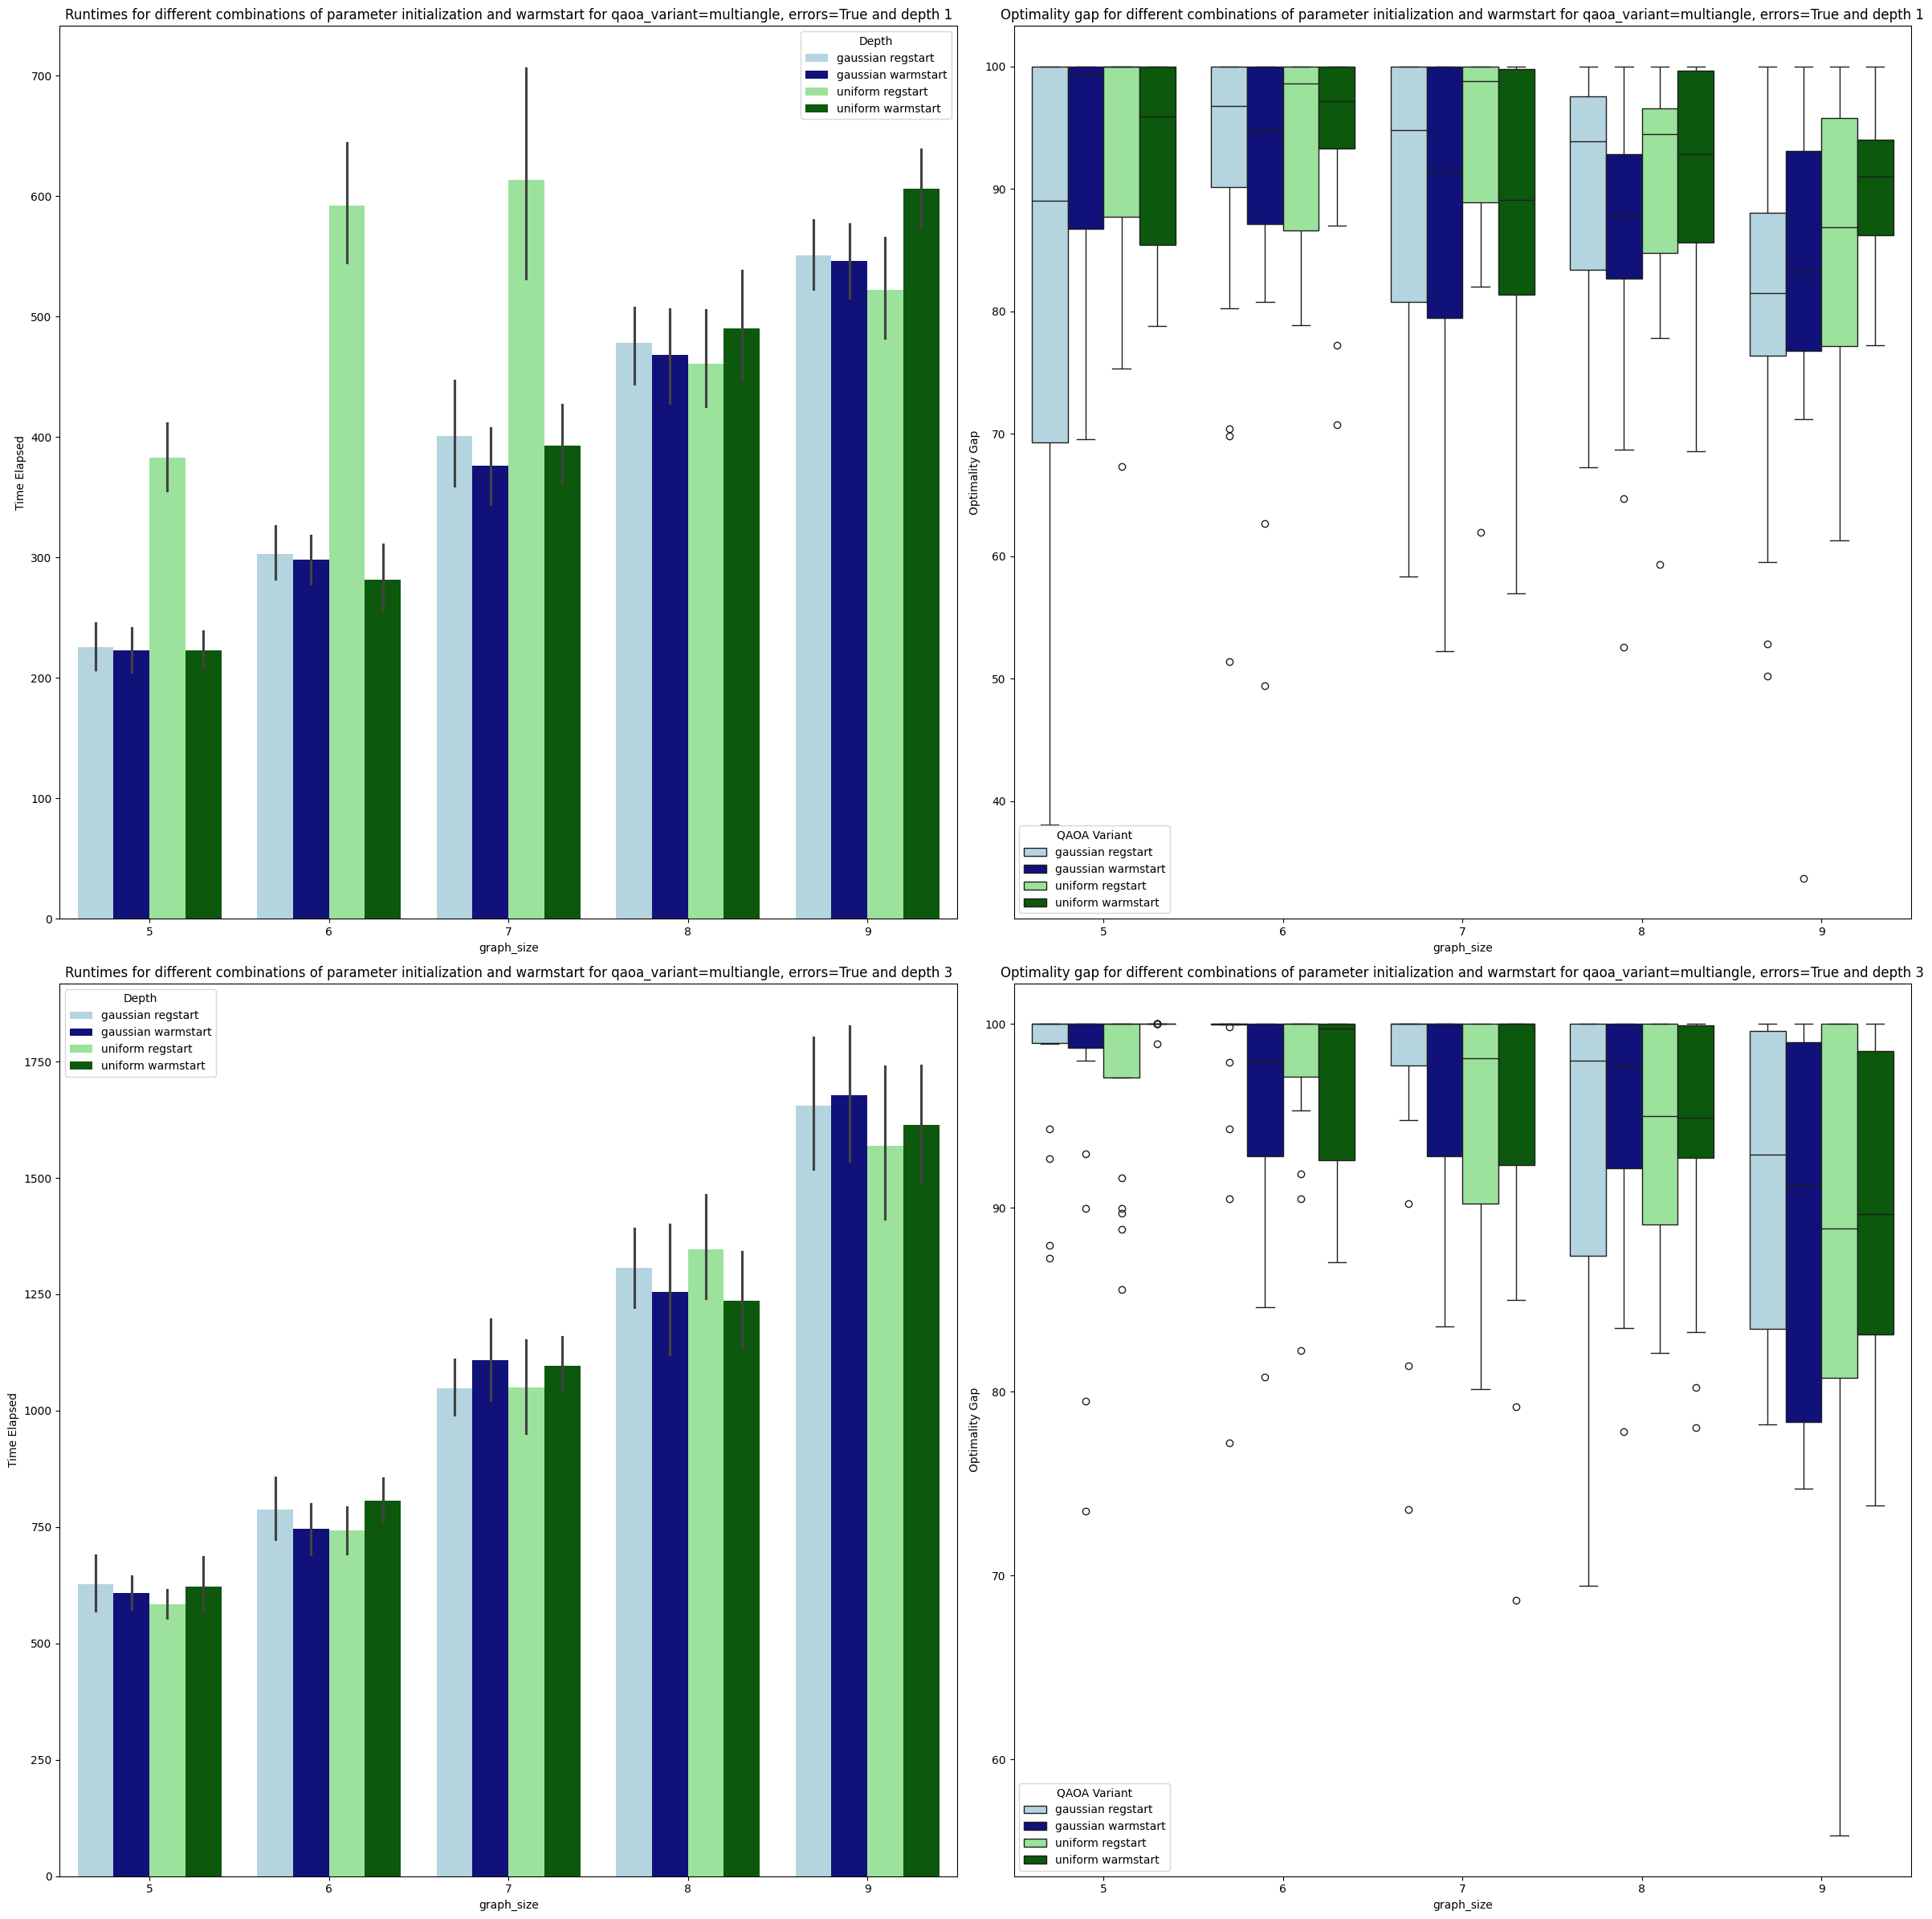

In [27]:
import seaborn as sns

import matplotlib.pyplot as plt

def warmstartconv(str):
    return 'warmstart' if str else 'regstart'
# Calculate the percent of optimal solution
combined_df['percent_optimal'] = (combined_df['quantum_obj_value'] / combined_df['classic_value']) * 100

combined_df['identifier'] = combined_df['param_initialization'] + ' '+ combined_df['warm_start'].apply(lambda x: warmstartconv(x)) 

def print_nice(df,filter_dict):
    filtered_df = df
    
    for column, value in filter_dict.items():
        filtered_df = filtered_df[filtered_df[column] == value]
    
    custom_colors = ['#ADD8E6', '#00008B', '#90EE90', '#006400']

    fig, axes = plt.subplots(2, 2, figsize=(24, 24))

    # Filter data for depth = 1
    depth_1_df = filtered_df[filtered_df['depth'] == 1]
    filter_str = ', '.join([f'{key}={value}' for key, value in filter_dict.items()])

    # Third plot
    sns.barplot(data=depth_1_df, x='graph_size', y='time_elapsed', hue='identifier', palette=custom_colors, ax=axes[0, 0])
    axes[0, 0].set_xlabel('graph_size')
    axes[0, 0].set_ylabel('Time Elapsed')
    axes[0, 0].set_title(f'Runtimes for different combinations of parameter initialization and warmstart for {filter_str} and depth 1')
    axes[0, 0].legend(title='Depth')

    # Fourth plot
    sns.boxplot(data=depth_1_df, x='graph_size', y='percent_optimal', hue='identifier', palette=custom_colors, ax=axes[0, 1])
    axes[0, 1].set_xlabel('graph_size')
    axes[0, 1].set_ylabel('Optimality Gap')
    axes[0, 1].set_title(f'Optimality gap for different combinations of parameter initialization and warmstart for {filter_str} and depth 1')
    axes[0, 1].legend(title='QAOA Variant')

    # Filter data for depth = 3
    depth_3_df = filtered_df[filtered_df['depth'] == 3]

    # Fifth plot
    sns.barplot(data=depth_3_df, x='graph_size', y='time_elapsed', hue='identifier', palette=custom_colors, ax=axes[1, 0])
    axes[1, 0].set_xlabel('graph_size')
    axes[1, 0].set_ylabel('Time Elapsed')
    axes[1, 0].set_title(f'Runtimes for different combinations of parameter initialization and warmstart for {filter_str} and depth 3')
    axes[1, 0].legend(title='Depth')

    # Sixth plot
    sns.boxplot(data=depth_3_df, x='graph_size', y='percent_optimal', hue='identifier', palette=custom_colors, ax=axes[1, 1])
    axes[1, 1].set_xlabel('graph_size')
    axes[1, 1].set_ylabel('Optimality Gap')
    axes[1, 1].set_title(f'Optimality gap for different combinations of parameter initialization and warmstart for {filter_str} and depth 3')
    axes[1, 1].legend(title='QAOA Variant')

    # Show the plots
    plt.tight_layout()
    plt.show()

print_nice(combined_df, {'qaoa_variant': 'multiangle', 'errors':True})


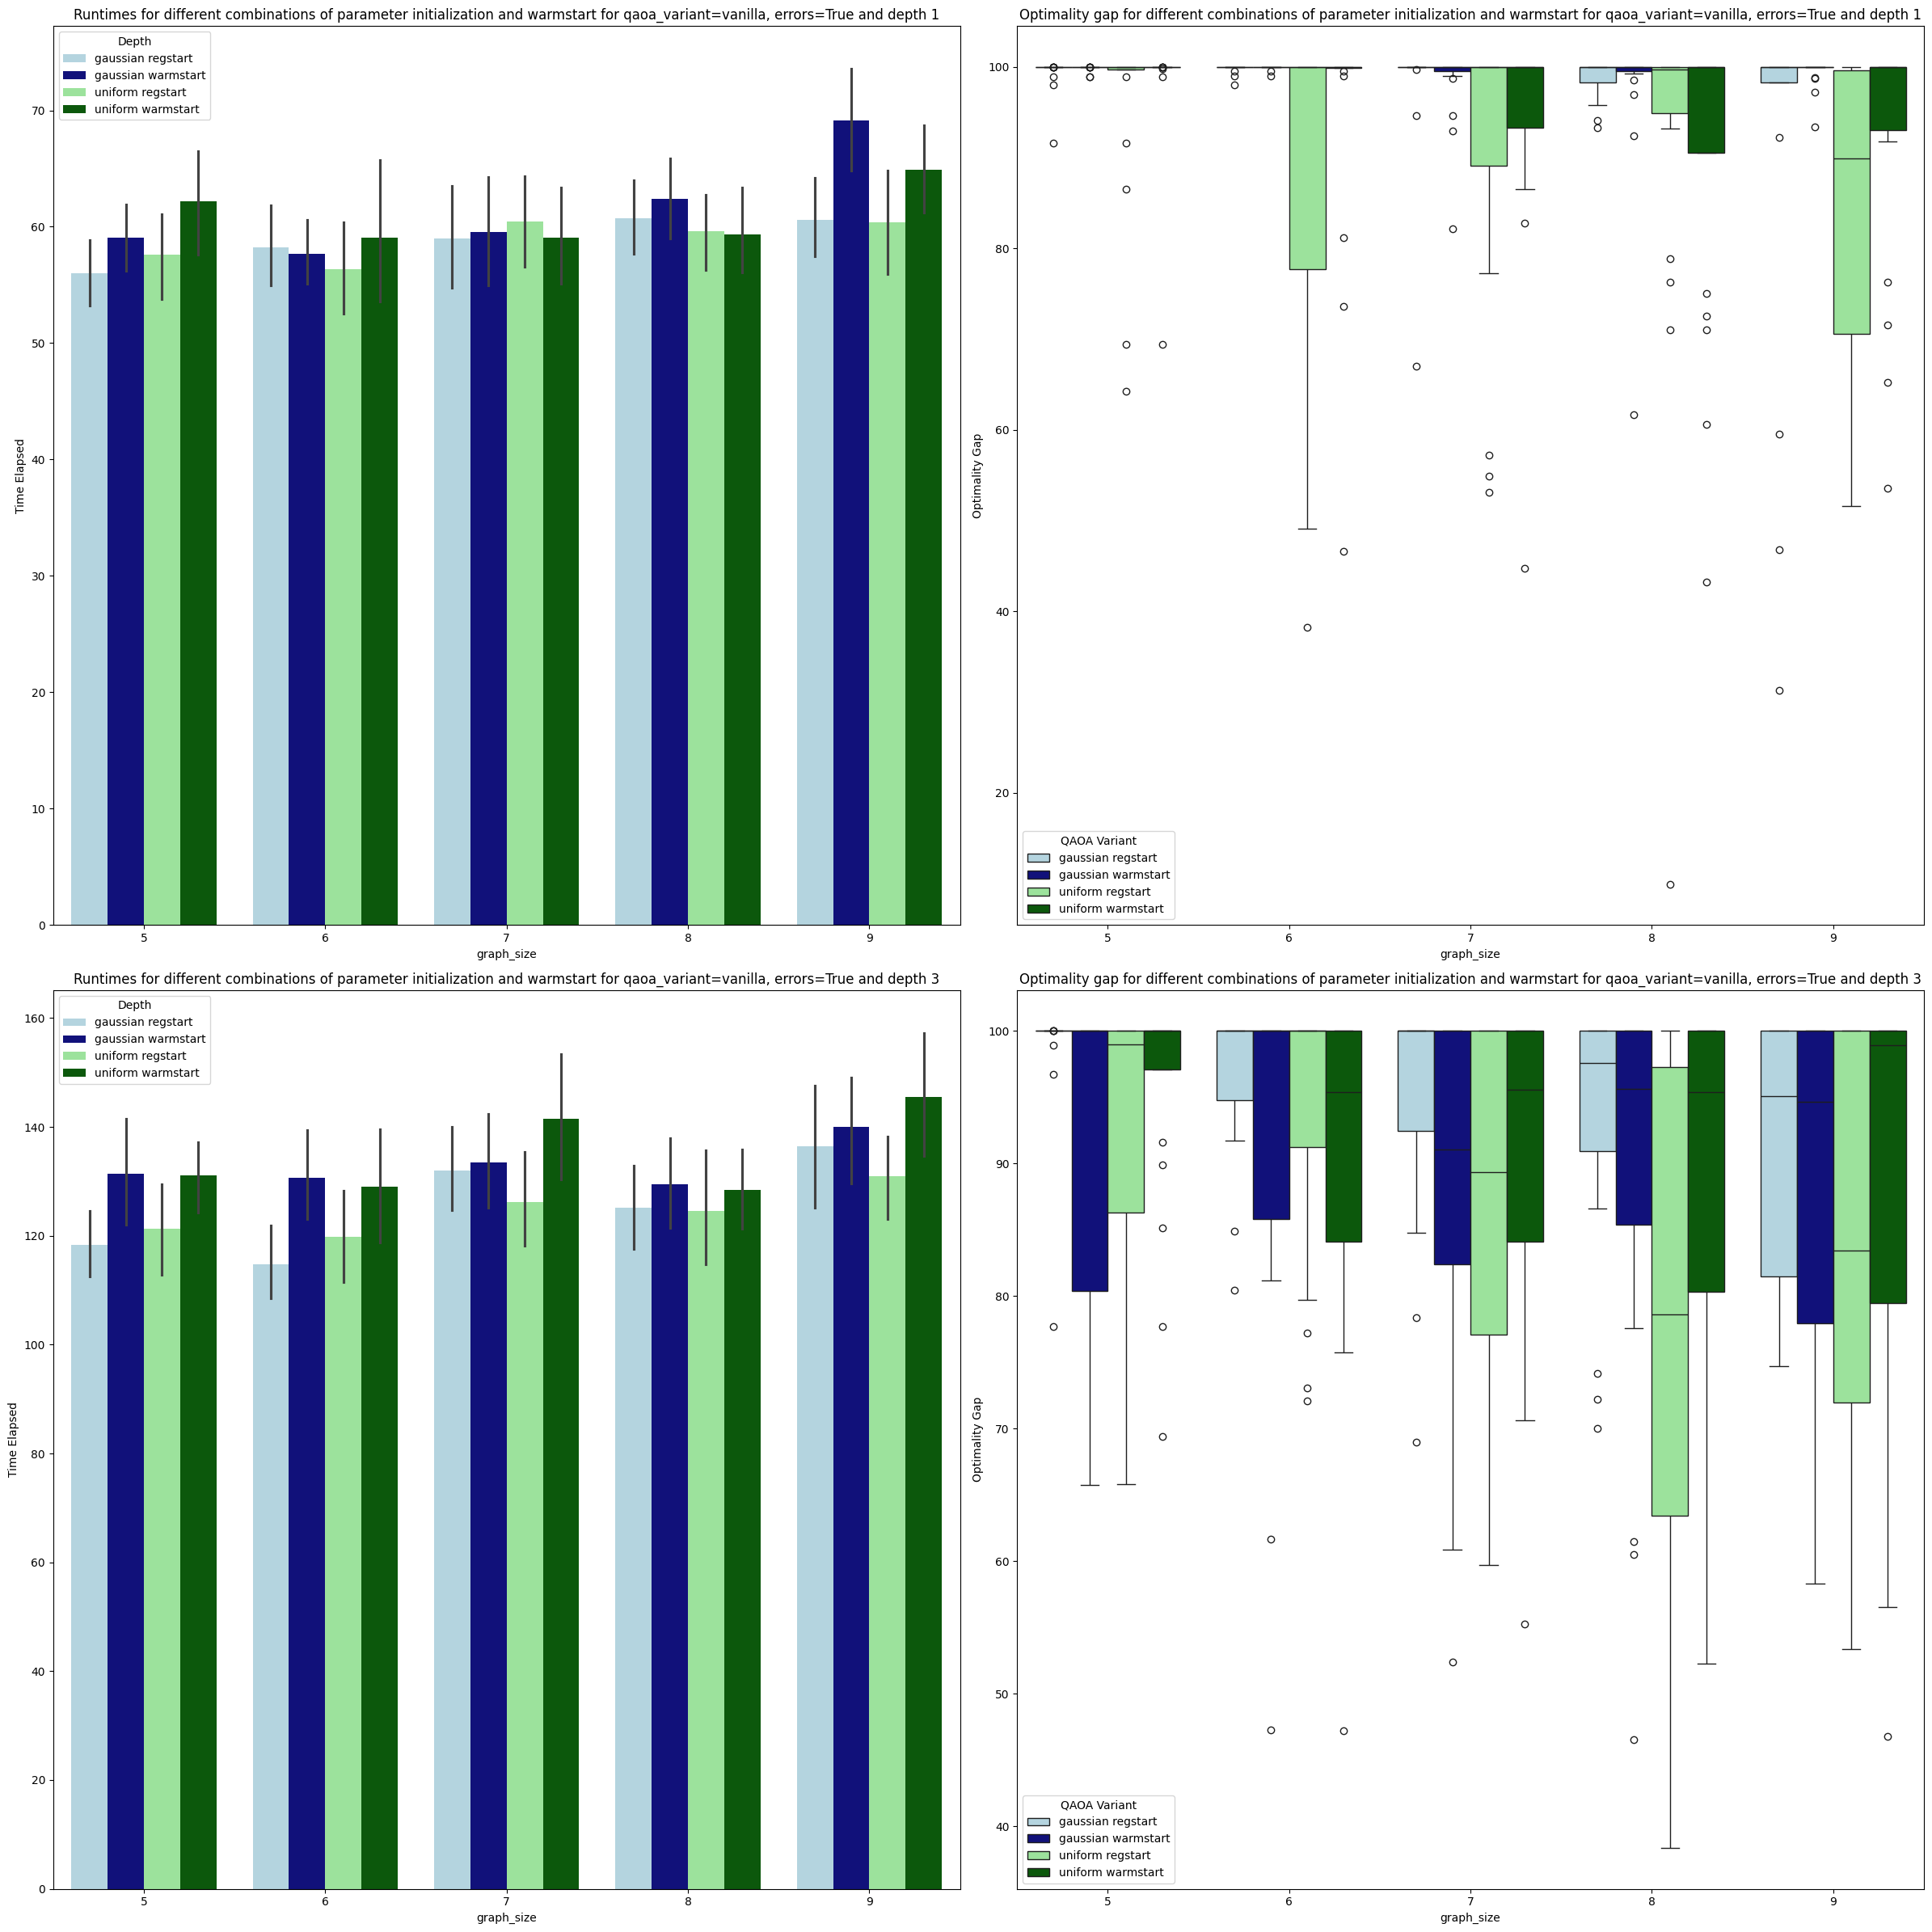

In [28]:
print_nice(combined_df,{'qaoa_variant': 'vanilla', 'errors':True})

C:\Users\torbjsme\AppData\Local\Temp\ipykernel_22268\361261969.py:27: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=depth_1_df, x='graph_size', y='time_elapsed', hue='identifier', palette=custom_colors, ax=axes[0, 0])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_22268\361261969.py:34: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(data=depth_1_df, x='graph_size', y='percent_optimal', hue='identifier', palette=custom_colors, ax=axes[0, 1])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_22268\361261969.py:44: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=depth_3_df, x='graph_size', y='time_elapsed', hue='identifier', palette=custom_colors, ax=axes[1, 0])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_22268\361261969.py:51: UserWarning: The palette list has more values (4) than needed (2), which

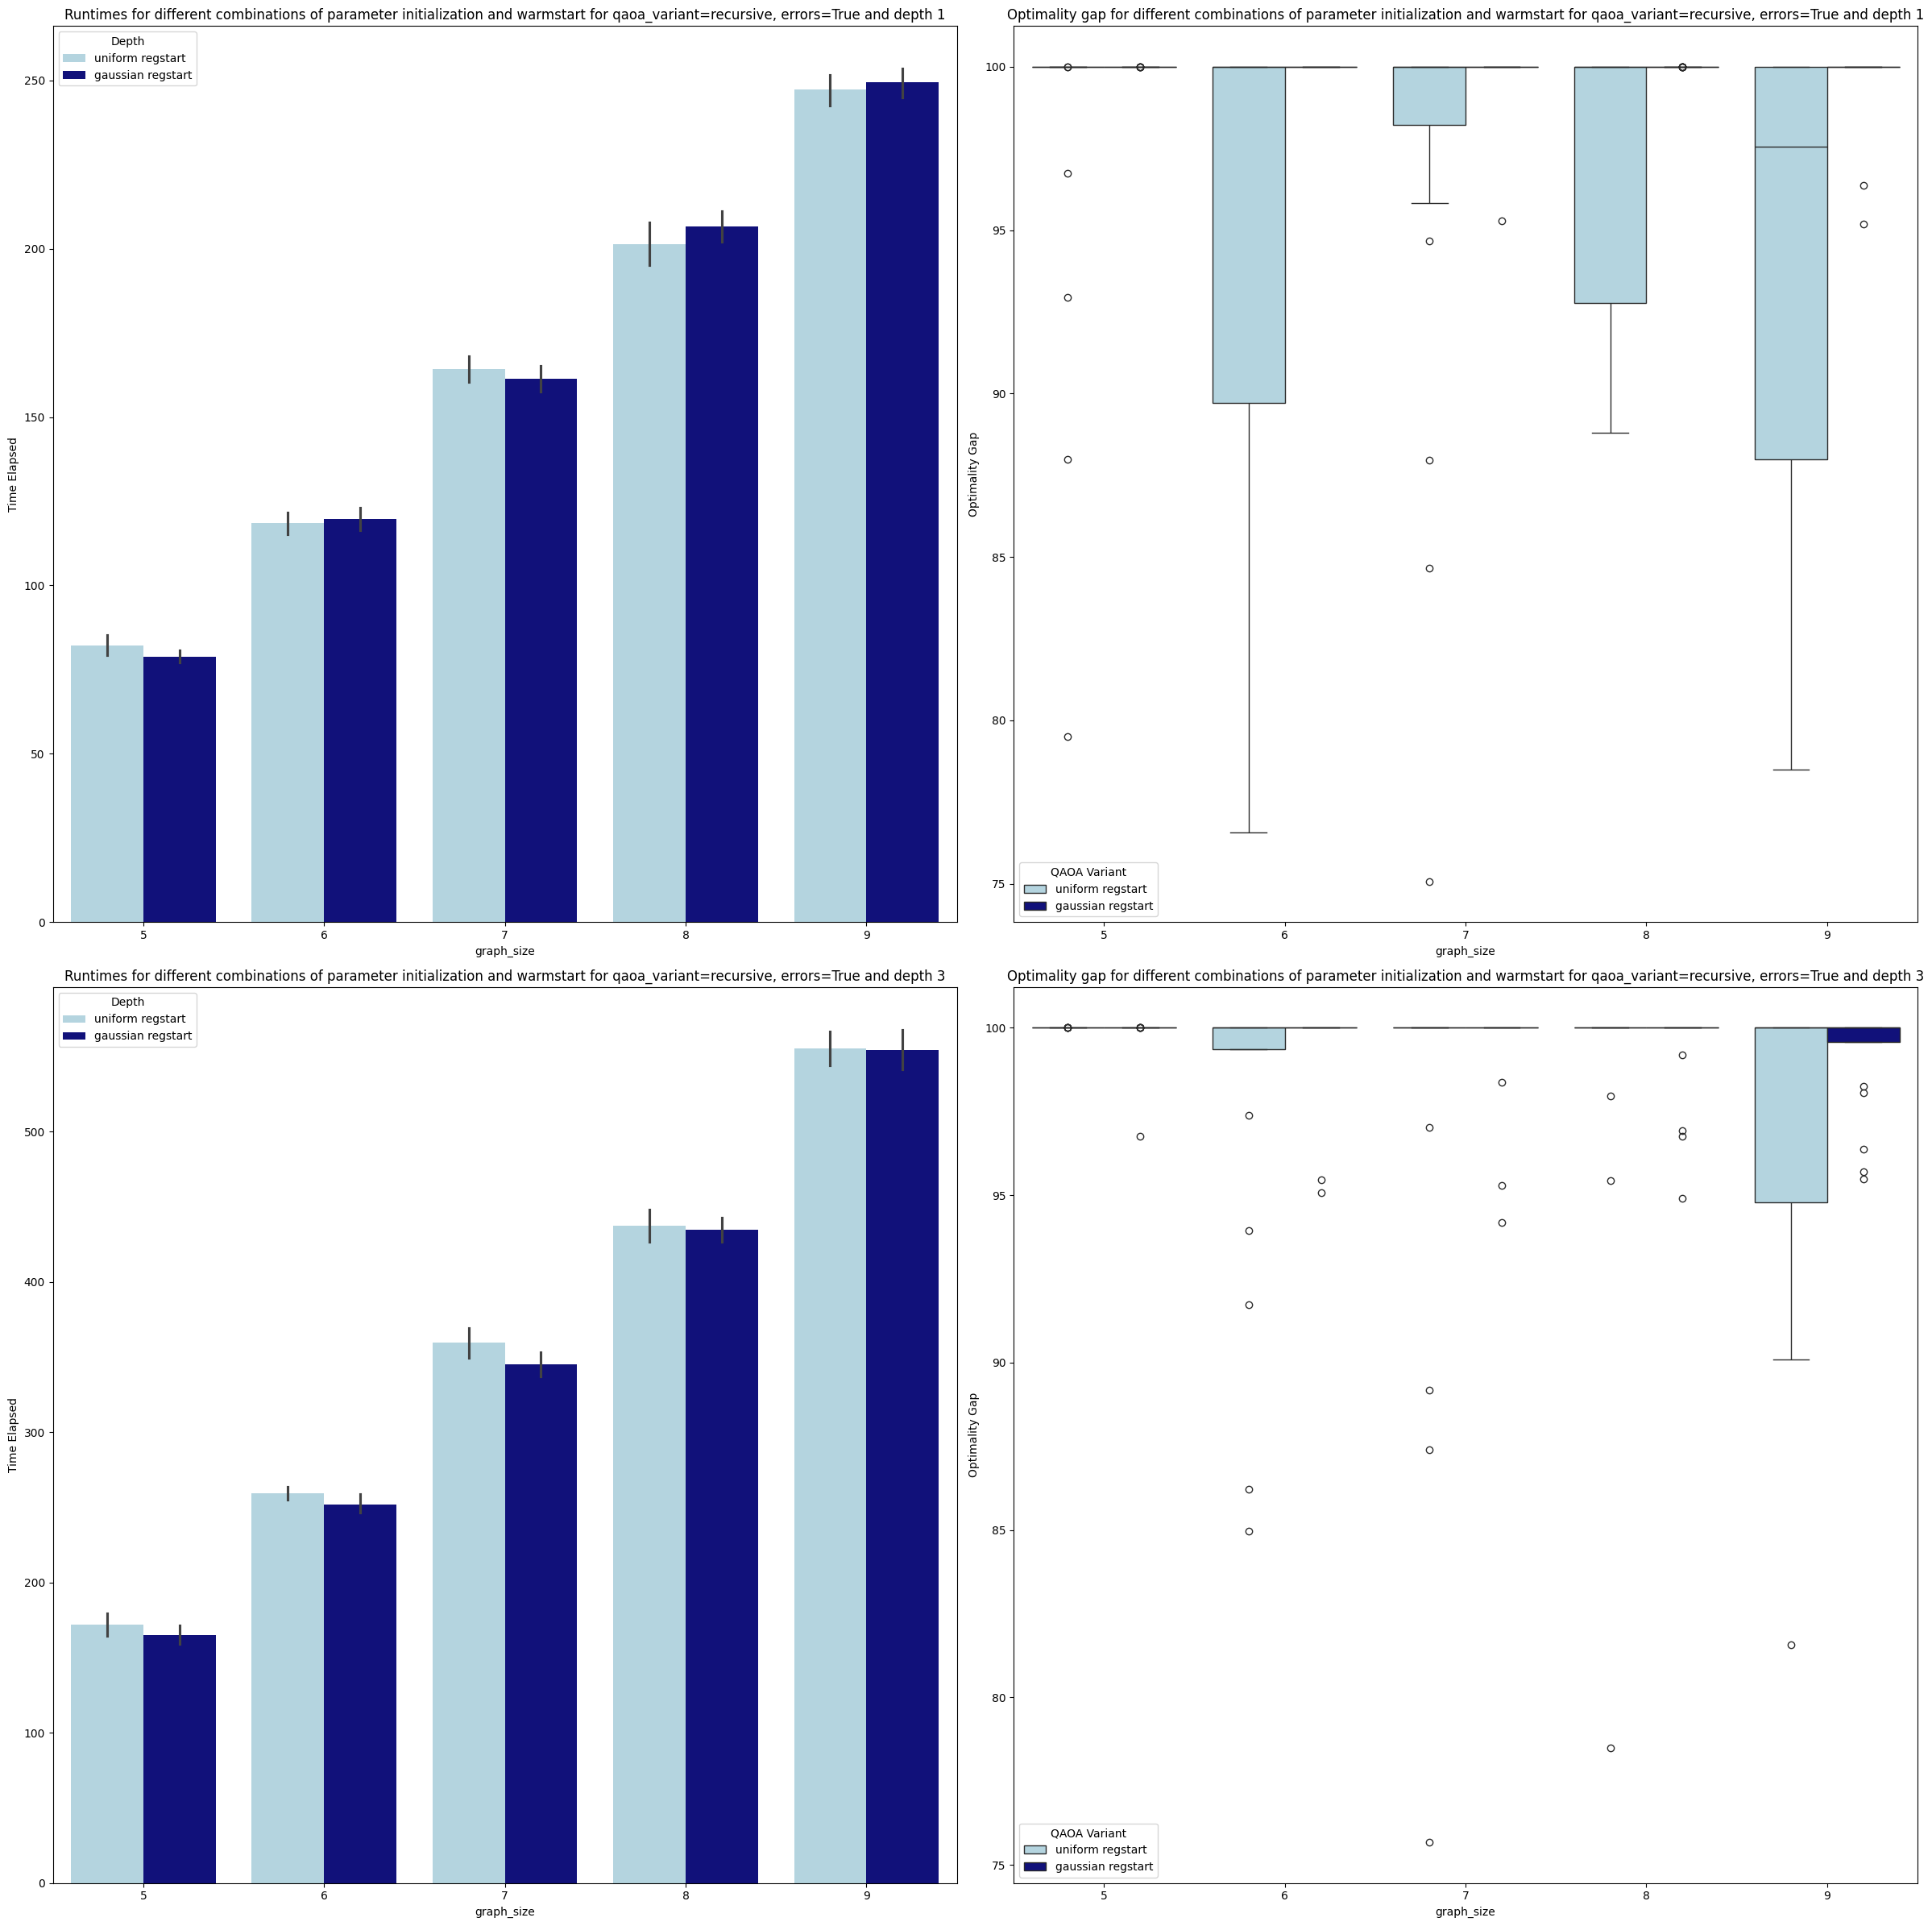

In [29]:
print_nice(combined_df, {'qaoa_variant': 'recursive', 'errors':True})

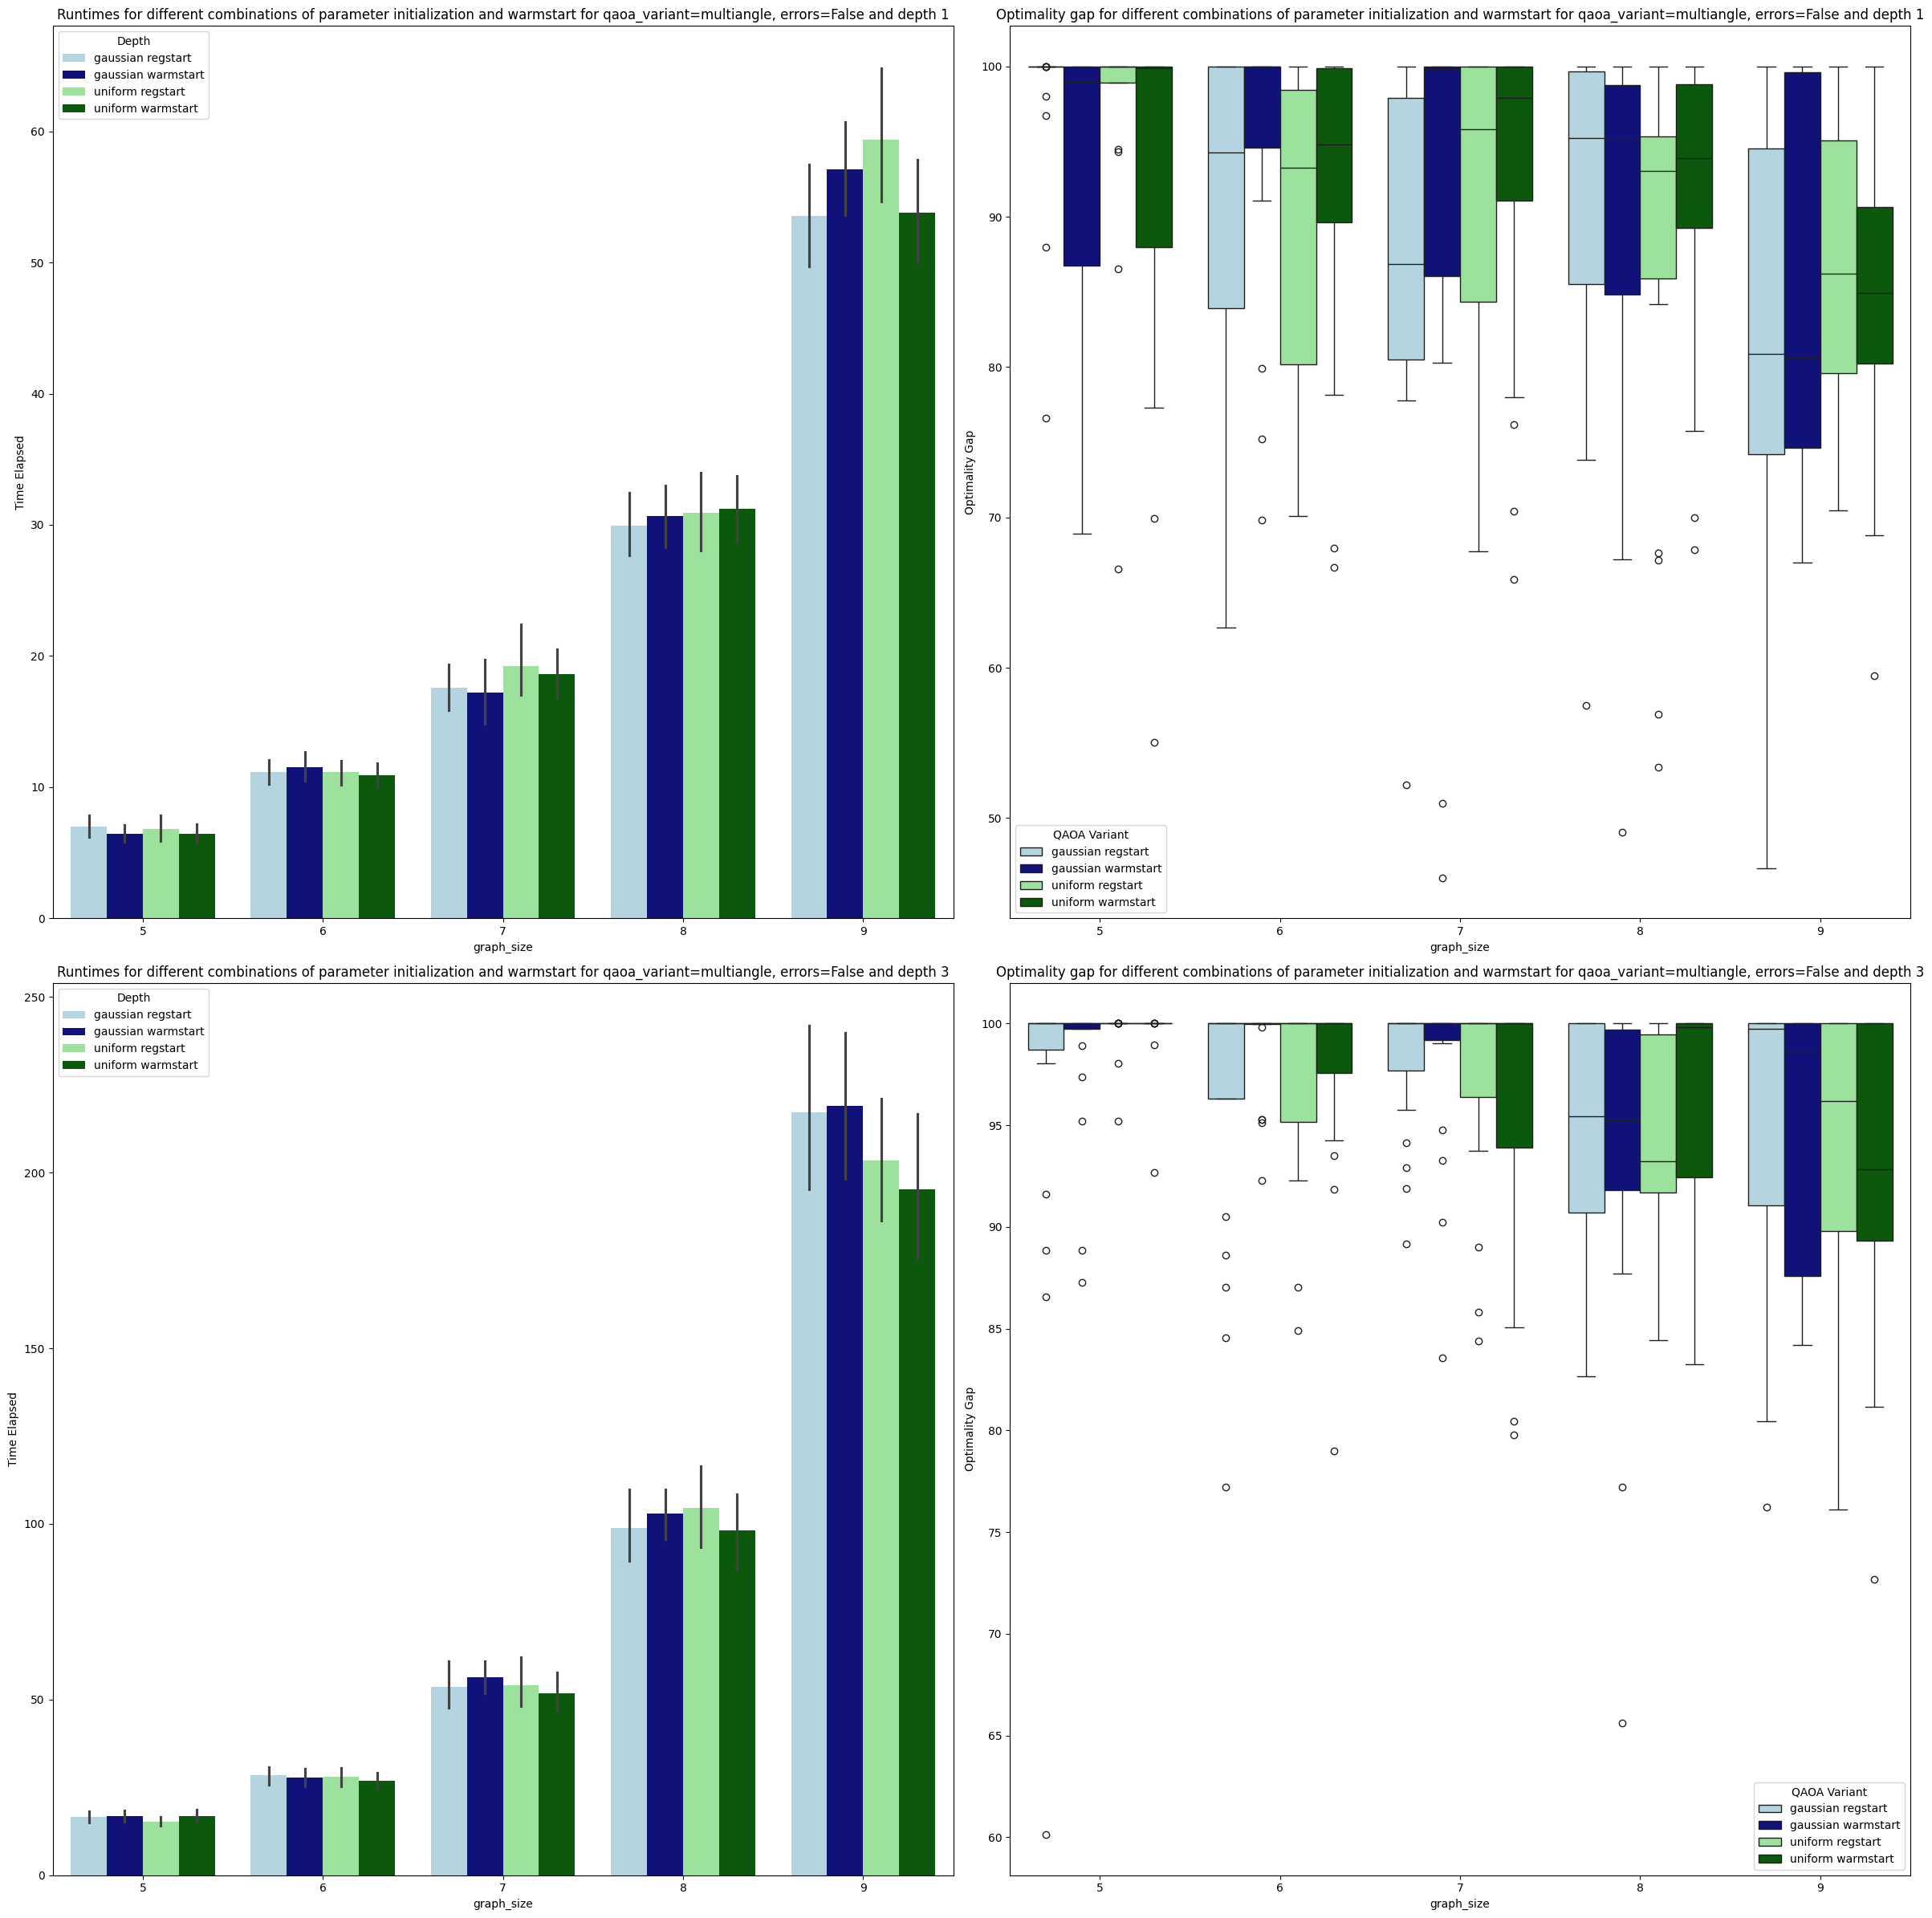

In [30]:
print_nice(combined_df,{'qaoa_variant': 'multiangle', 'errors':False})

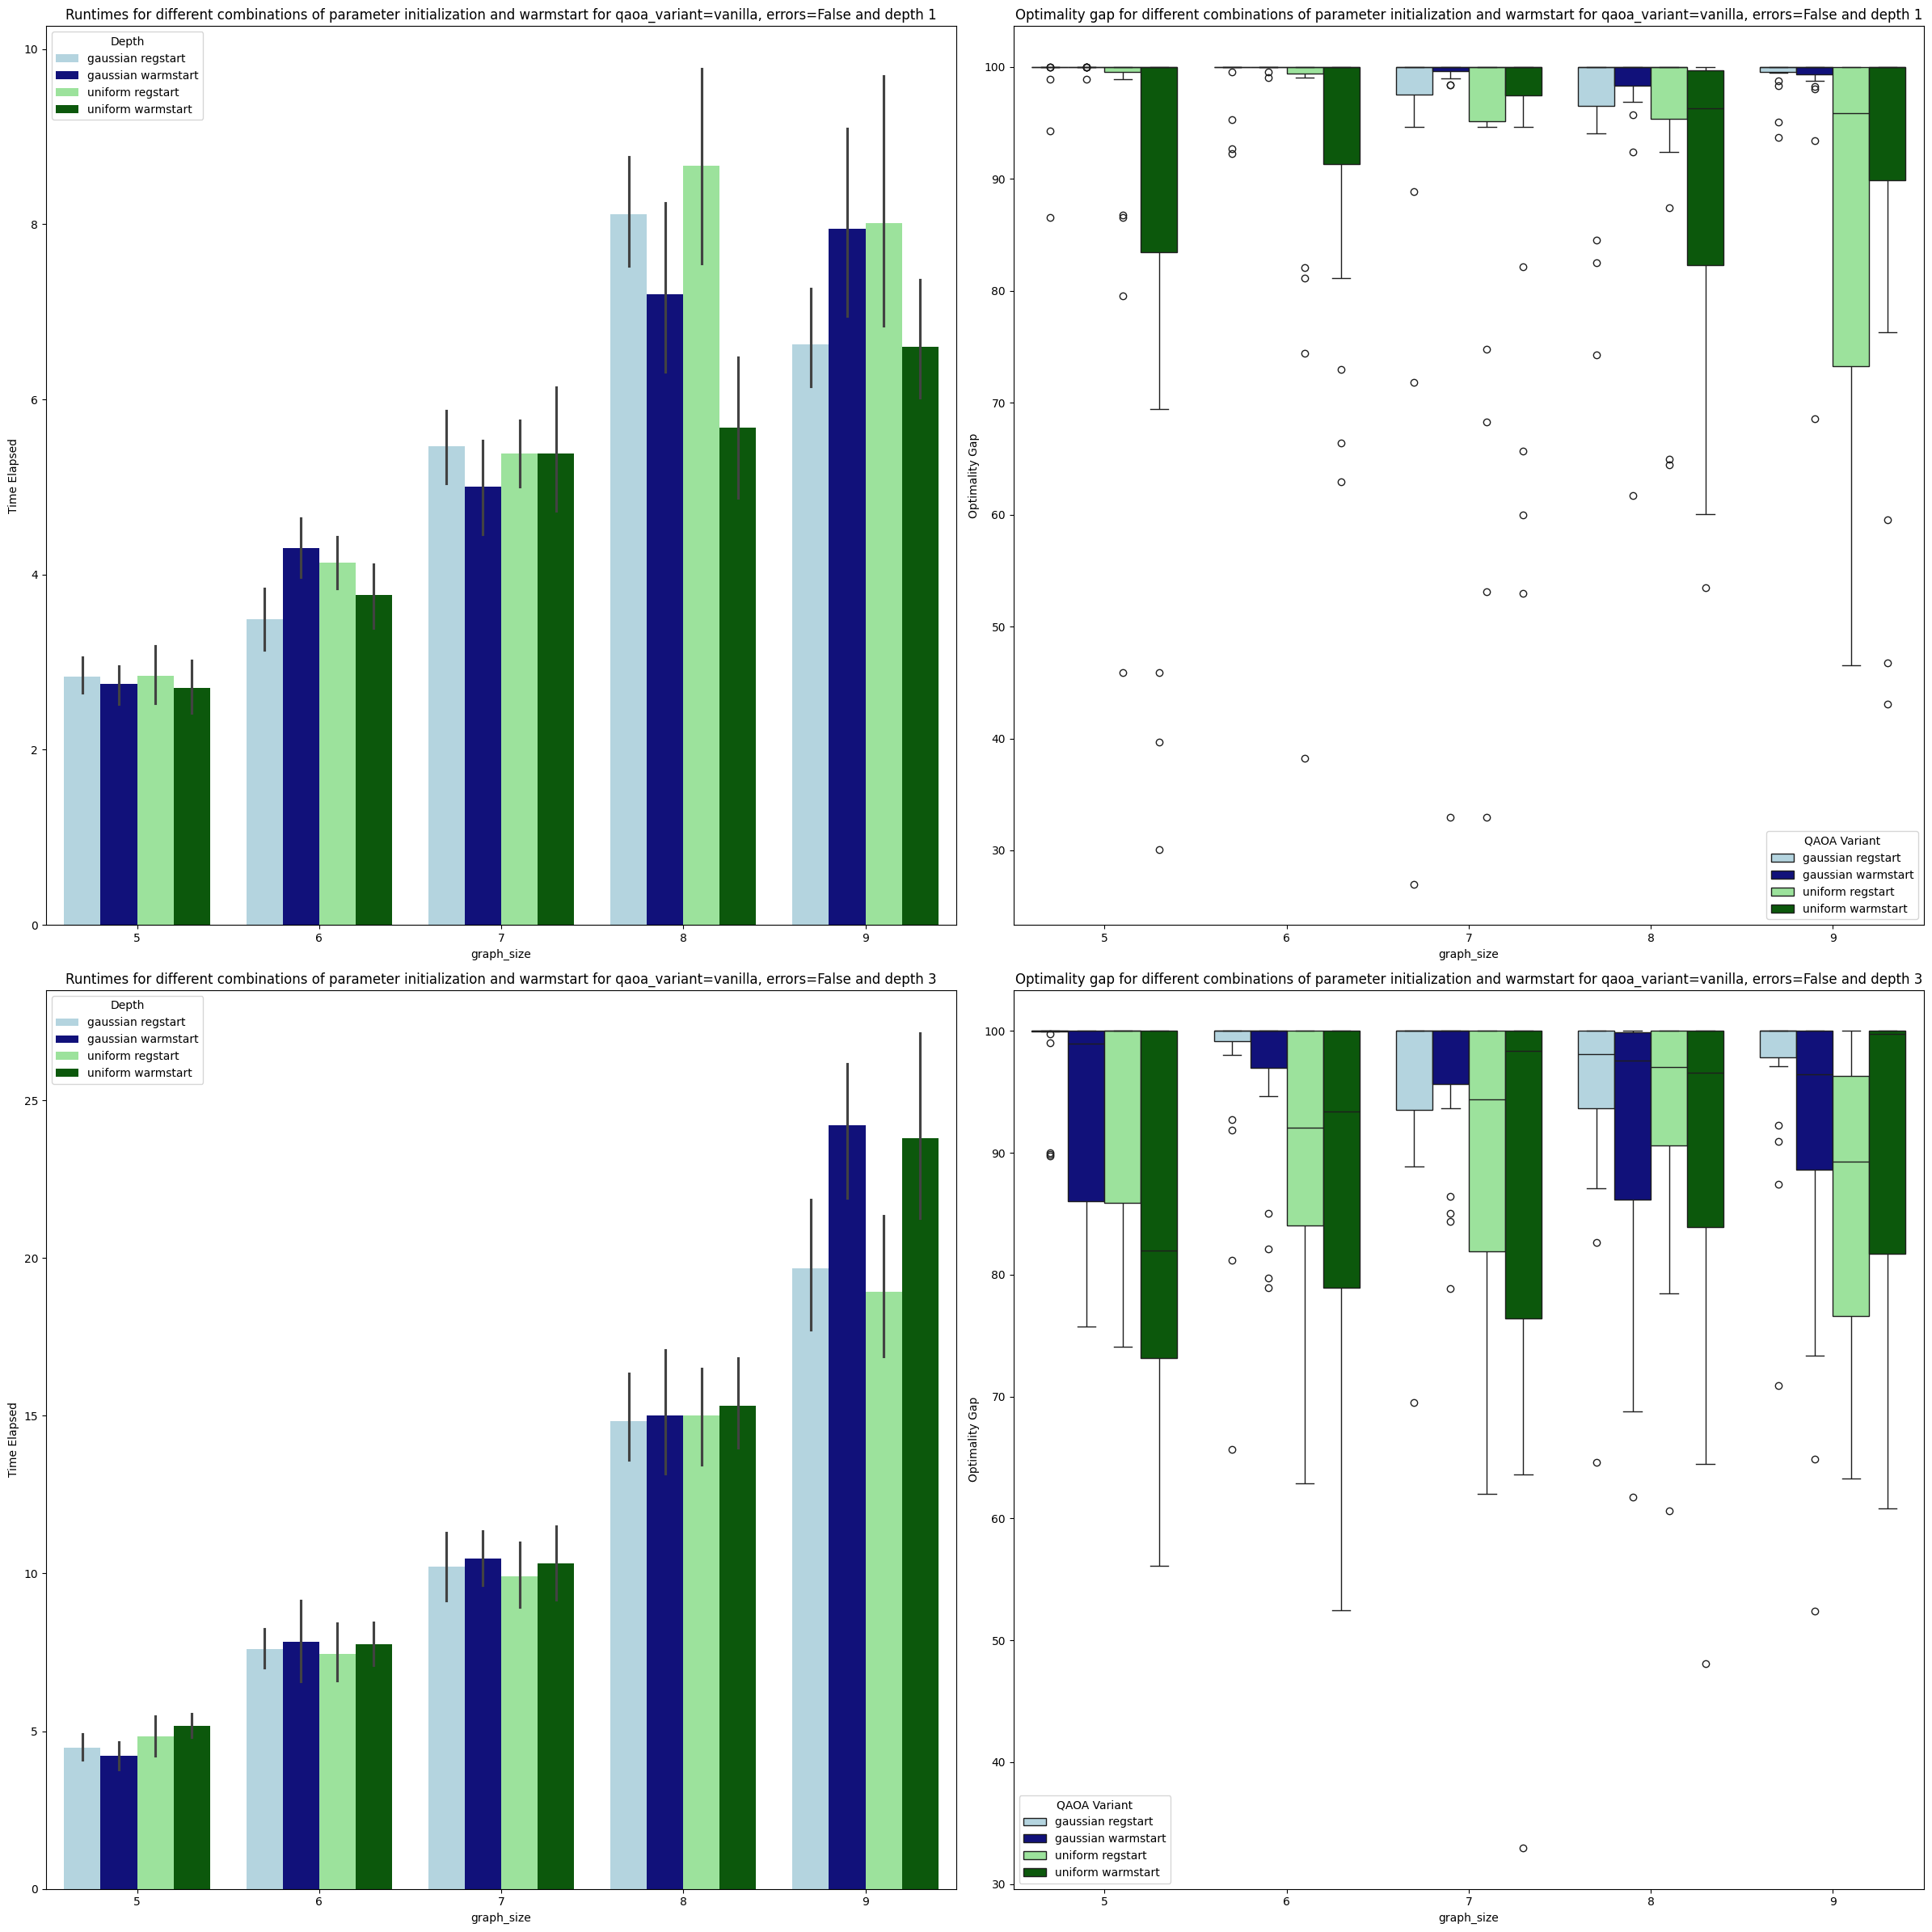

In [31]:
print_nice(combined_df,{'qaoa_variant': 'vanilla', 'errors':False})

C:\Users\torbjsme\AppData\Local\Temp\ipykernel_22268\361261969.py:27: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=depth_1_df, x='graph_size', y='time_elapsed', hue='identifier', palette=custom_colors, ax=axes[0, 0])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_22268\361261969.py:34: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(data=depth_1_df, x='graph_size', y='percent_optimal', hue='identifier', palette=custom_colors, ax=axes[0, 1])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_22268\361261969.py:44: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=depth_3_df, x='graph_size', y='time_elapsed', hue='identifier', palette=custom_colors, ax=axes[1, 0])
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_22268\361261969.py:51: UserWarning: The palette list has more values (4) than needed (2), which

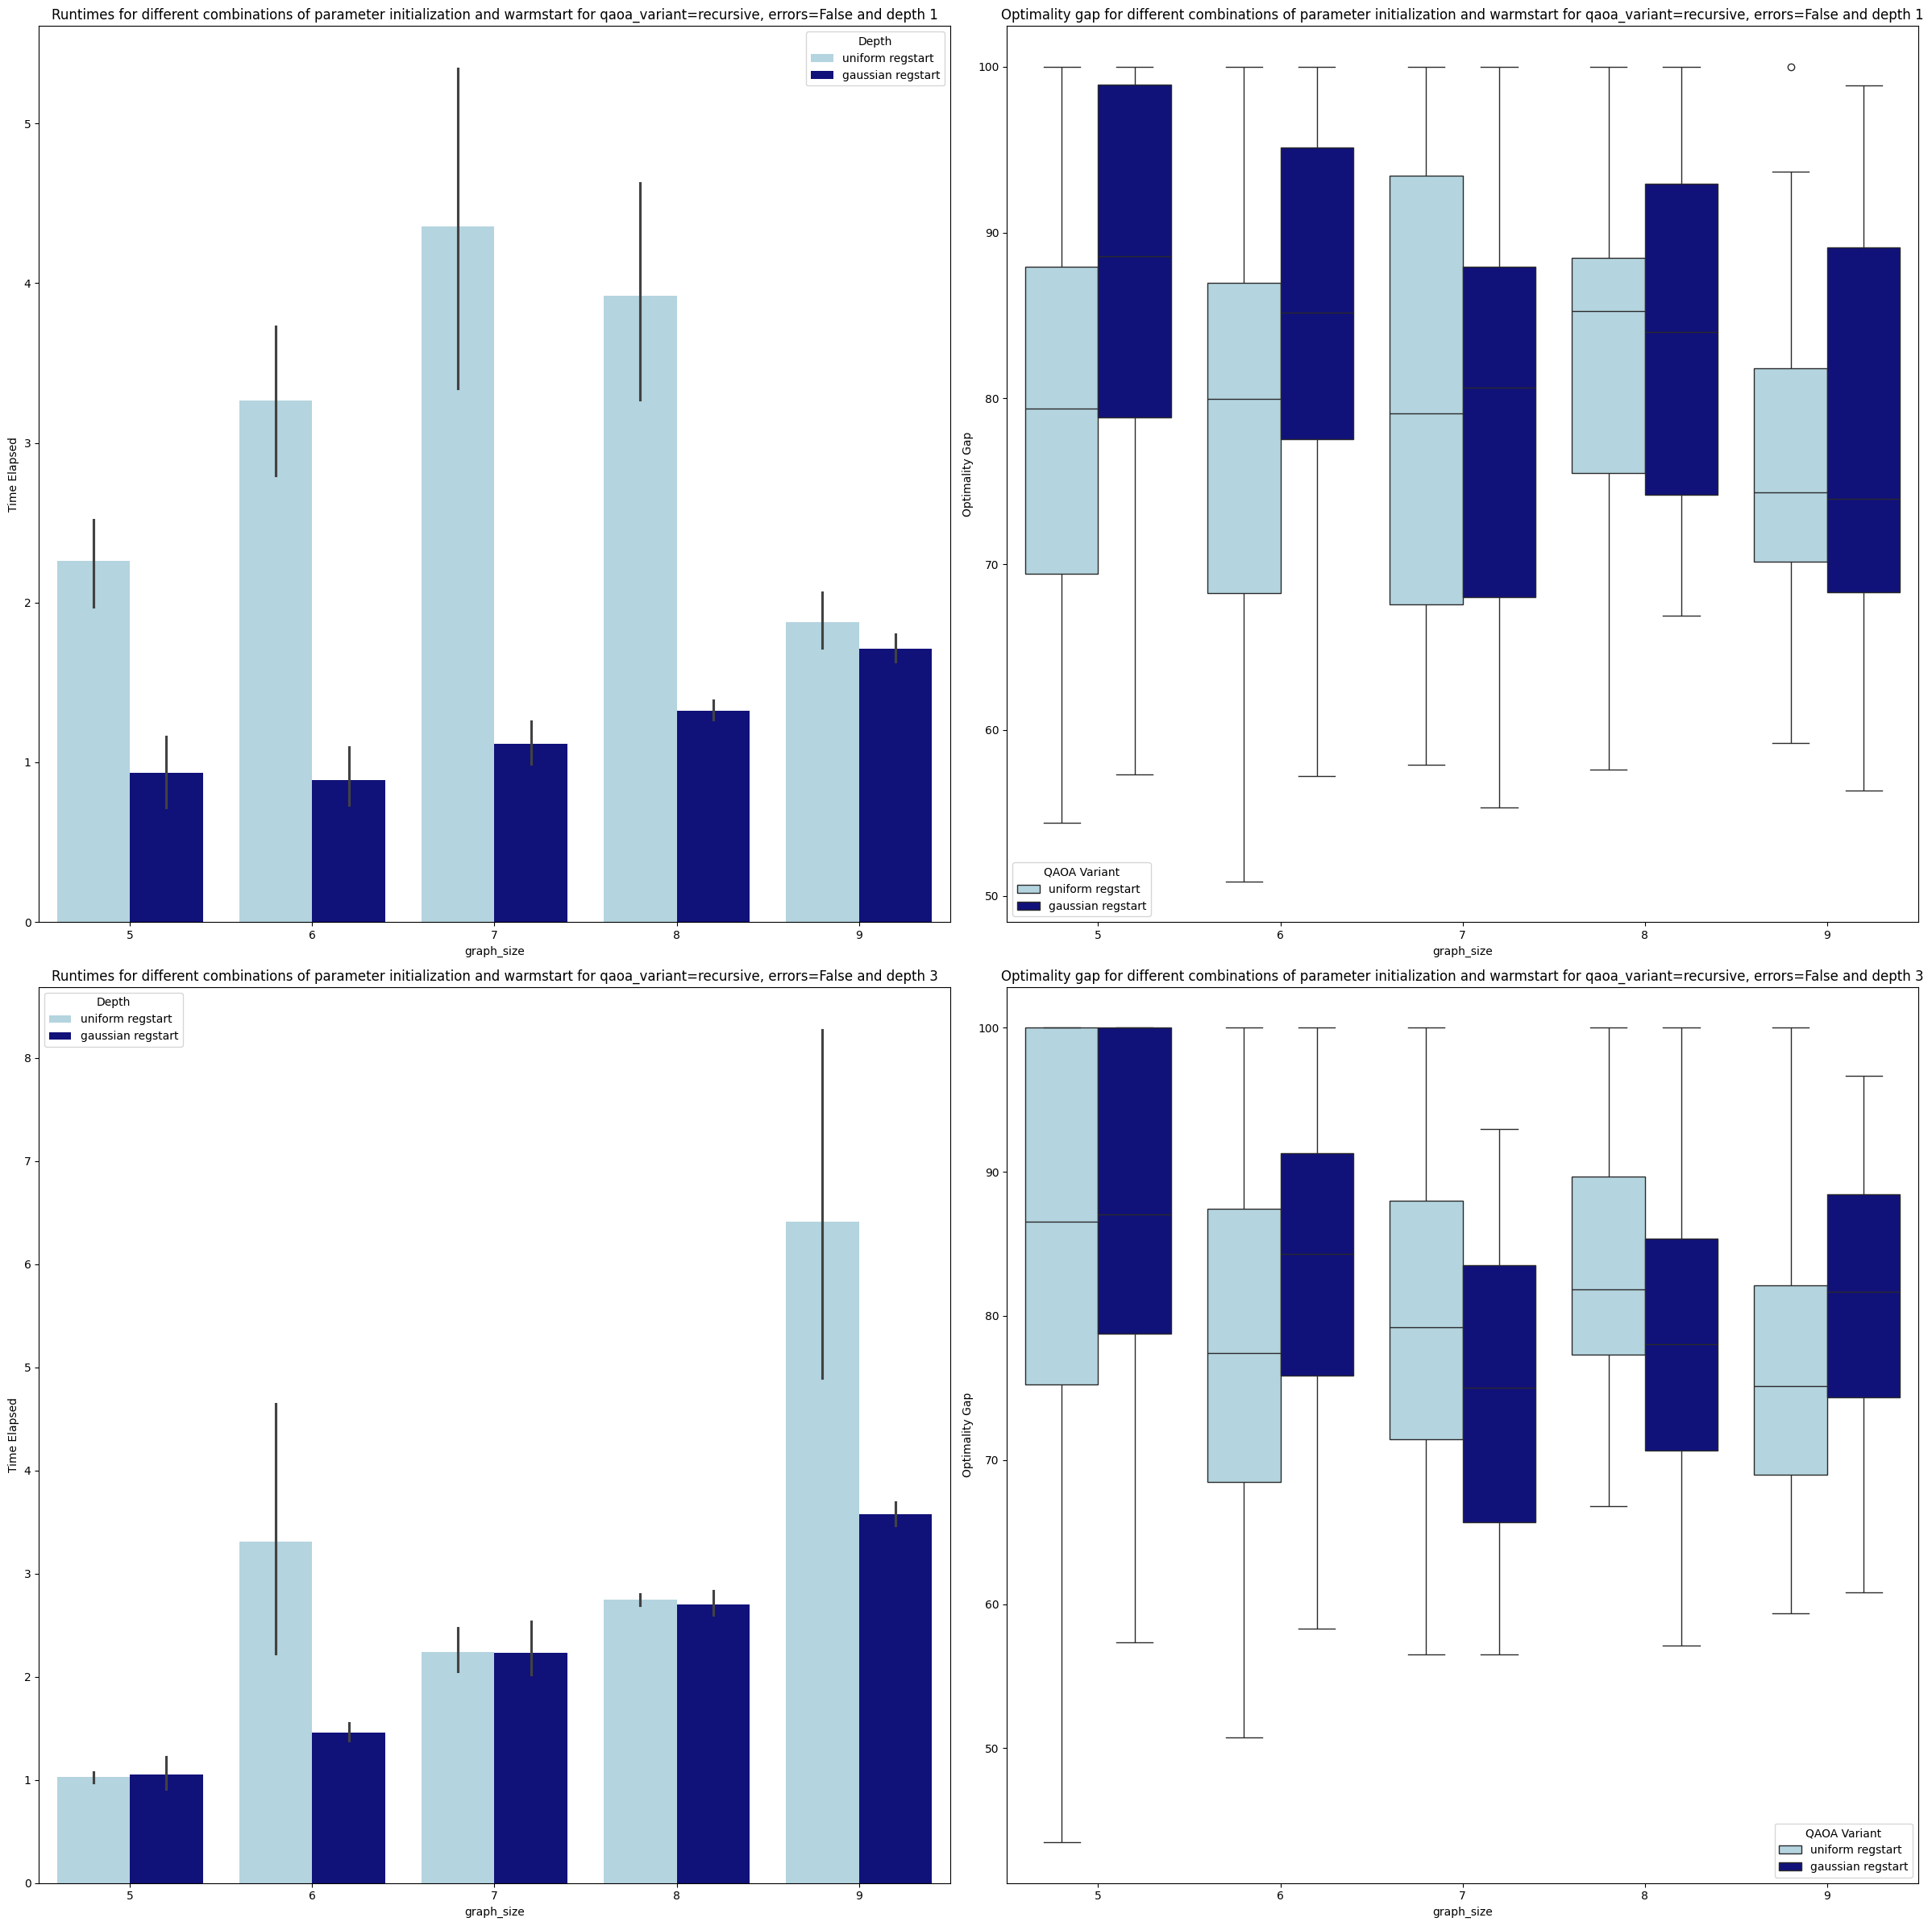

In [32]:
print_nice(combined_df, {'qaoa_variant': 'recursive', 'errors':False})

In [33]:
# Group by 'identifier' and calculate the mean of 'percent_optimal'
error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'vanilla')]

error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))

aggregate_percent_optimal = error_df.groupby('identifier')['percent_optimal'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'Average Percent Optimal']

# Display the aggregate table
print('Vanilla',aggregate_percent_optimal)


error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'multiangle')]
error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))

aggregate_percent_optimal = error_df.groupby('identifier')['percent_optimal'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'Average Percent Optimal']

# Display the aggregate table
print('multiangle', aggregate_percent_optimal)

error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'recursive')]
error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))

aggregate_percent_optimal = error_df.groupby('identifier')['percent_optimal'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'Average Percent Optimal']

# Display the aggregate table
print('recursive', aggregate_percent_optimal)

Vanilla             Identifier  Average Percent Optimal
0   gaussian regstart1                97.468648
1   gaussian regstart3                94.892773
2  gaussian warmstart1                99.002492
3  gaussian warmstart3                89.734737
4    uniform regstart1                89.800027
5    uniform regstart3                86.464019
6   uniform warmstart1                94.109341
7   uniform warmstart3                90.402183
multiangle             Identifier  Average Percent Optimal
0   gaussian regstart1                87.049980
1   gaussian regstart3                95.458297
2  gaussian warmstart1                87.500428
3  gaussian warmstart3                94.532759
4    uniform regstart1                91.349369
5    uniform regstart3                94.361105
6   uniform warmstart1                90.913654
7   uniform warmstart3                94.861628
recursive            Identifier  Average Percent Optimal
0  gaussian regstart1                99.868703
1  gaussian r

C:\Users\torbjsme\AppData\Local\Temp\ipykernel_22268\2859878201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_22268\2859878201.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_22268\2859878201.py:27: SettingWithCopyWarning: 

In [34]:
# Group by 'identifier' and calculate the mean of 'percent_optimal'
error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'vanilla')]

error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))

aggregate_percent_optimal = error_df.groupby('identifier')['quantum_func_evals'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'quantum_func_evals']

# Display the aggregate table
print('Vanilla',aggregate_percent_optimal)


error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'multiangle')]
error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))

aggregate_percent_optimal = error_df.groupby('identifier')['quantum_func_evals'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'quantum_func_evals']

# Display the aggregate table
print('multiangle', aggregate_percent_optimal)

error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'recursive')]
error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))

aggregate_percent_optimal = error_df.groupby('identifier')['quantum_func_evals'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'quantum_func_evals']

# Display the aggregate table
print('recursive', aggregate_percent_optimal)

Vanilla             Identifier  quantum_func_evals
0   gaussian regstart1               19.12
1   gaussian regstart3               40.20
2  gaussian warmstart1               20.28
3  gaussian warmstart3               43.15
4    uniform regstart1               19.12
5    uniform regstart3               40.23
6   uniform warmstart1               20.10
7   uniform warmstart3               43.52
multiangle             Identifier  quantum_func_evals
0   gaussian regstart1              130.83
1   gaussian regstart3              360.20
2  gaussian warmstart1              128.75
3  gaussian warmstart3              358.25
4    uniform regstart1              125.67
5    uniform regstart3              354.05
6   uniform warmstart1              132.96
7   uniform warmstart3              354.46
recursive            Identifier  quantum_func_evals
0  gaussian regstart1              123.92
1  gaussian regstart3              266.04
2   uniform regstart1              123.70
3   uniform regstart3        

C:\Users\torbjsme\AppData\Local\Temp\ipykernel_22268\3710257482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_22268\3710257482.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_22268\3710257482.py:27: SettingWithCopyWarning: 